# PENDAHULUAN

Airbnb telah menjadi platform populer untuk penyewaan properti jangka pendek, memberikan alternatif penginapan yang fleksibel dan beragam bagi wisatawan. Namun, dengan semakin banyaknya properti yang terdaftar, persaingan antar pemilik properti semakin ketat. Pemahaman yang mendalam tentang karakteristik ketersediaan, produk, dan lokasi menjadi kunci untuk mengoptimalkan performa listing, meningkatkan tingkat hunian, dan memaksimalkan pendapatan. Dengan menganalisis data Airbnb, kita dapat mengidentifikasi pola-pola utama yang memengaruhi kinerja listing, seperti faktor lokasi strategis, fasilitas yang diminati, dan waktu-waktu tertentu dengan permintaan tinggi.

Optimalisasi ini tidak hanya membantu pemilik properti meningkatkan pendapatan, tetapi juga mempermudah wisatawan dalam menemukan penginapan yang sesuai dengan preferensi mereka. Selain itu, hasil analisis dapat memberikan wawasan bagi komunitas lokal dan pelaku industri pariwisata untuk memanfaatkan peluang ekonomi dari platform Airbnb secara lebih efektif.



Rumusan Masalah

Bagaimana pengaruh ketersediaan listing terhadap tingkat hunian dan pendapatan?

Fasilitas dan karakteristik produk apa yang paling berpengaruh terhadap daya tarik listing di Airbnb?

Apakah lokasi listing memengaruhi tingkat hunian, dan bagaimana pola permintaan berdasarkan area tertentu?

Bagaimana strategi optimasi dapat dirancang berdasarkan analisis ketersediaan, produk, dan lokasi?

# LOAD DATA

In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as stats
from scipy import stats
import warnings
import folium
warnings.filterwarnings("ignore")

In [186]:
df = pd.read_csv('Airbnb Listings Bangkok.csv')
display(df.head(),df.tail())

Unnamed: 0      id                                            name  \
0           0   27934                 Nice room with superb city view   
1           1   27979                  Easy going landlord,easy place   
2           2   28745               modern-style apartment in Bangkok   
3           3   35780  Spacious one bedroom at The Kris Condo Bldg. 3   
4           4  941865                      Suite Room 3 at MetroPoint   

   host_id   host_name neighbourhood  latitude  longitude        room_type  \
0   120437      Nuttee   Ratchathewi  13.75983  100.54134  Entire home/apt   
1   120541         Emy       Bang Na  13.66818  100.61674     Private room   
2   123784  Familyroom     Bang Kapi  13.75232  100.62402     Private room   
3   153730     Sirilak     Din Daeng  13.78823  100.57256     Private room   
4   610315       Kasem     Bang Kapi  13.76872  100.63338     Private room   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0   1905               3                 65  2020-01-06               0.50   
1   1316               1                  0         NaN                NaN   
2    800              60                  0         NaN                NaN   
3   1286               7                  2  2022-04-01               0.03   
4   1905               1                  0         NaN                NaN   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  
0                               2               353                      0  
1                               2               358                      0  
2                               1               365                      0  
3                               1               323                      1  
4                               3               365                      0

Unnamed: 0                  id  \
15849       15849  790465040741092826   
15850       15850  790474503157243541   
15851       15851  790475335086864240   
15852       15852  790475546213717328   
15853       15853  790476492384199044   

                                                     name    host_id  \
15849       素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街   94899359   
15850  Euro LuxuryHotel PratunamMKt TripleBdNrShopingArea  491526222   
15851   Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea  491526222   
15852   Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea  491526222   
15853   Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea  491526222   

       host_name neighbourhood   latitude   longitude     room_type  price  \
15849      Renee       Pra Wet  13.715132  100.653458  Private room   2298   
15850  Phakhamon   Ratchathewi  13.753052  100.538738  Private room   1429   
15851  Phakhamon   Ratchathewi  13.753169  100.538700  Private room   1214   
15852  Phakhamon   Ratchathewi  13.754789  100.538757  Private room   1214   
15853  Phakhamon   Ratchathewi  13.752960  100.540820  Private room   1214   

       minimum_nights  number_of_reviews last_review  reviews_per_month  \
15849              28                  0         NaN                NaN   
15850               1                  0         NaN                NaN   
15851               1                  0         NaN                NaN   
15852               1                  0         NaN                NaN   
15853               1                  0         NaN                NaN   

       calculated_host_listings_count  availability_365  number_of_reviews_ltm  
15849                               1               362                      0  
15850                              14               365                      0  
15851                              14               365                      0  
15852                              14               365                      0  
15853                              14               365                      0

## Deskripsi Fitur

| Kolom | Penjelasan |
|---|---|
| id |  nomor unik untuk setiap baris |
| name | Nama dari listing atau properti |
| host_id | Identifikasi unik untuk pemilik atau host dari listing|
| host_name | Nama pemilik atau host dari listing |
| neighbourhood: | Nama lingkungan atau area di mana listing berada |
| latitude | Koordinat lintang dari lokasi listing |
| longtitude | Koordinat bujur dari lokasi listing |
| room_type | Jenis kamar yang ditawarkan dalam listing |
| price | Harga per malam untuk menyewa listing |
| minimum_nights | Jumlah minimum malam yang harus dipesan oleh tamu |
| number_of_reviews | Jumlah total ulasan yang diterima oleh listing. |
| last_review | Tanggal ulasan terakhir yang diterima |
| reviews_per_month | Rata-rata jumlah ulasan yang diterima per bulan |
| calculated_host_listings_count | Jumlah total listing yang dimiliki oleh host |
| availability_365 | Jumlah hari dalam setahun (maksimal 365) di mana listing tersedia untuk disewa |
| number_of_reviews_ltm | Jumlah ulasan dalam 12 bulan terakhir |




# DATA UNDERSTANDING

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15853 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               15854 non-null  int64  
 12  last_review                     

Insight:

*   Dapat dilihat bahwa data yang dimiliki berdimensi 15854 baris dan 17 kolom. Terdapat kekeliruan yaitu variabel Unnamed, yang berikutnya akan dihapus karena tidak relevan untuk keperluan analisa berikutnya dan tipe data pada variabel last_review, dimana seharusnya tipe data variabel tersebut adalah datetime.

*   kolom name, host_name, last_review, dan review_per_month memiliki null values

*   kolom last_review berupa tanggal review terakhir seharusnya berupa datetime tapi masih bertipe object





In [188]:
# Statistika Deskriptif
display(df.describe(), df.describe(include='object'))

Unnamed: 0            id       host_id      latitude     longitude  \
count  15854.000000  1.585400e+04  1.585400e+04  15854.000000  15854.000000   
mean    7926.500000  1.579397e+17  1.541058e+08     13.745144    100.559903   
std     4576.799919  2.946015e+17  1.318726e+08      0.043040      0.050911   
min        0.000000  2.793400e+04  5.892000e+04     13.527300    100.329550   
25%     3963.250000  2.104509e+07  3.974431e+07     13.720090    100.529690   
50%     7926.500000  3.503734e+07  1.224556e+08     13.738490    100.561415   
75%    11889.750000  5.256154e+07  2.390547e+08     13.759497    100.585150   
max    15853.000000  7.908162e+17  4.926659e+08     13.953540    100.923440   

              price  minimum_nights  number_of_reviews  reviews_per_month  \
count  1.585400e+04    15854.000000       15854.000000       10064.000000   
mean   3.217704e+03       15.292355          16.654157           0.813145   
std    2.497212e+04       50.815020          40.613331           1.090196   
min    0.000000e+00        1.000000           0.000000           0.010000   
25%    9.000000e+02        1.000000           0.000000           0.120000   
50%    1.429000e+03        1.000000           2.000000           0.435000   
75%    2.429000e+03        7.000000          13.000000           1.060000   
max    1.100000e+06     1125.000000        1224.000000          19.130000   

       calculated_host_listings_count  availability_365  number_of_reviews_ltm  
count                    15854.000000      15854.000000           15854.000000  
mean                        13.889618        244.378643               3.481519  
std                         30.269848        125.843224               8.916937  
min                          1.000000          0.000000               0.000000  
25%                          1.000000        138.000000               0.000000  
50%                          4.000000        309.000000               0.000000  
75%                         13.000000        360.000000               3.000000  
max                        228.000000        365.000000             325.000000

name host_name  \
count                                              15846     15853   
unique                                             14794      5312   
top     New!  La Chada Night Market studio 2PPL near MRT     Curry   
freq                                                  45       228   

       neighbourhood        room_type last_review  
count          15854            15854       10064  
unique            50                4        1669  
top          Vadhana  Entire home/apt  2022-12-11  
freq            2153             8912         189

*   pada variabel price jika kita perhatikan pada nilai pada nilai minimumnya adalah 0, ini tidak masuk akal mengingat tidak mungkin penginapan menawarkan harga 0(gratis) dan juga nilai maximum yang terlalu tinggi yaitu 1100000 (dalam bath, jika dalam rupiah sekitar 47,7 juta rupiah per malam).
*   Terdapat anomali minimum_nights pada nilai max yaitu 1125

Pada nilai maksimum memiliki gap tiga kali lipat dari pada 75% sebaran value(Q3) nya yang mana antara minimum sampai Q3 nya saja bahkan tidak sampai dua kali lipat.
Hal yang sama juga terjadi pada variabel number_of_reviews pada hubungan75% sebaran value(Q3) dan nilai maksimumnya.

In [189]:
# Melakukan filter untuk nilai maksimum pada kolom 'price'
min_price_data = df[df['price'] == 0.000000e+00]
min_price_data

Unnamed: 0        id                           name    host_id  \
11103       11103  44563108  Somerset Maison Asoke Bangkok  360620448   

                   host_name neighbourhood  latitude  longitude   room_type  \
11103  Somerset Maison Asoke       Vadhana  13.73815   100.5642  Hotel room   

       price  minimum_nights  number_of_reviews last_review  \
11103      0               1                  0         NaN   

       reviews_per_month  calculated_host_listings_count  availability_365  \
11103                NaN                               1                 0   

       number_of_reviews_ltm  
11103                      0

In [190]:
# Melakukan filter untuk nilai maksimum pada kolom 'price'
max_price_data = df[df['price'] == 1100000]
max_price_data

Unnamed: 0                  id                                   name  \
12868       12868  635676064543597376  New 1 bedroom apartment BTS MRT Asoke   

        host_id host_name neighbourhood   latitude   longitude  \
12868  12464705     Lucio       Vadhana  13.742186  100.560394   

             room_type    price  minimum_nights  number_of_reviews  \
12868  Entire home/apt  1100000              14                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
12868         NaN                NaN                               1   

       availability_365  number_of_reviews_ltm  
12868               365                      0

In [191]:
# Melakukan filter untuk nilai maksimum pada kolom 'price'
max_mn_data = df[df['minimum_nights'] == 1125]
max_mn_data

Unnamed: 0       id                                               name  \
61          61  1041976  Long-stay special rate spacious entire floor Siam   

    host_id host_name neighbourhood  latitude  longitude        room_type  \
61  5735895    Pariya   Parthum Wan  13.74814  100.52016  Entire home/apt   

    price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
61   2900            1125                295  2021-08-21               2.61   

    calculated_host_listings_count  availability_365  number_of_reviews_ltm  
61                               3                 0                      0

In [192]:
# mengidentifikasi value pada tiap column category
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
pd.set_option('display.max_colwidth',None)

def unique_data(df):
    data_unique = pd.DataFrame()
    data_unique['Columns'] = df.columns
    data_unique['Unique Count'] = [df[col].nunique() for col in (df.columns)]
    data_unique['Unique'] = [df[col].unique()[:5] for col in (df.columns)]
    return data_unique


unique_data(df)

Columns  Unique Count  \
0                       Unnamed: 0         15854   
1                               id         15854   
2                             name         14794   
3                          host_id          6659   
4                        host_name          5312   
5                    neighbourhood            50   
6                         latitude          9606   
7                        longitude         10224   
8                        room_type             4   
9                            price          3040   
10                  minimum_nights            86   
11               number_of_reviews           298   
12                     last_review          1669   
13               reviews_per_month           513   
14  calculated_host_listings_count            50   
15                availability_365           366   
16           number_of_reviews_ltm            85   

                                                                                                                                                                              Unique  
0                                                                                                                                                                    [0, 1, 2, 3, 4]  
1                                                                                                                                               [27934, 27979, 28745, 35780, 941865]  
2   [Nice room with superb city view, Easy going landlord,easy place, modern-style apartment in Bangkok, Spacious one bedroom at The Kris Condo Bldg. 3, Suite Room 3 at MetroPoint]  
3                                                                                                                                           [120437, 120541, 123784, 153730, 610315]  
4                                                                                                                                          [Nuttee, Emy, Familyroom, Sirilak, Kasem]  
5                                                                                                                        [Ratchathewi, Bang Na, Bang Kapi, Din Daeng, Bang Kho laen]  
6                                                                                                                                 [13.75983, 13.66818, 13.75232, 13.78823, 13.76872]  
7                                                                                                                            [100.54134, 100.61674, 100.62402, 100.57256, 100.63338]  
8                                                                                                                           [Entire home/apt, Private room, Hotel room, Shared room]  
9                                                                                                                                                      [1905, 1316, 800, 1286, 1000]  
10                                                                                                                                                                [3, 1, 60, 7, 250]  
11                                                                                                                                                                 [65, 0, 2, 19, 1]  
12                                                                                                                             [2020-01-06, nan, 2022-04-01, 2017-08-03, 2014-02-03]  
13                                                                                                                                                      [0.5, nan, 0.03, 0.17, 0.01]  
14                                                                                                                                                                 [2, 1, 3, 41, 10]  
15                                                                                                                                                          [353, 

Insight :
*   Hanya ada 4 tipe kamar (Entire home/apt, Private room, Hotel room, Shared room). Ini menunjukkan bahwa pasar sewa memiliki kategori yang jelas
*   Terdapat nan values pada last_review dan review_per_month  yang artinya listing tersebut tidak memiliki review dari customer


*   Item daftar



## DISTRIBUSI DATA

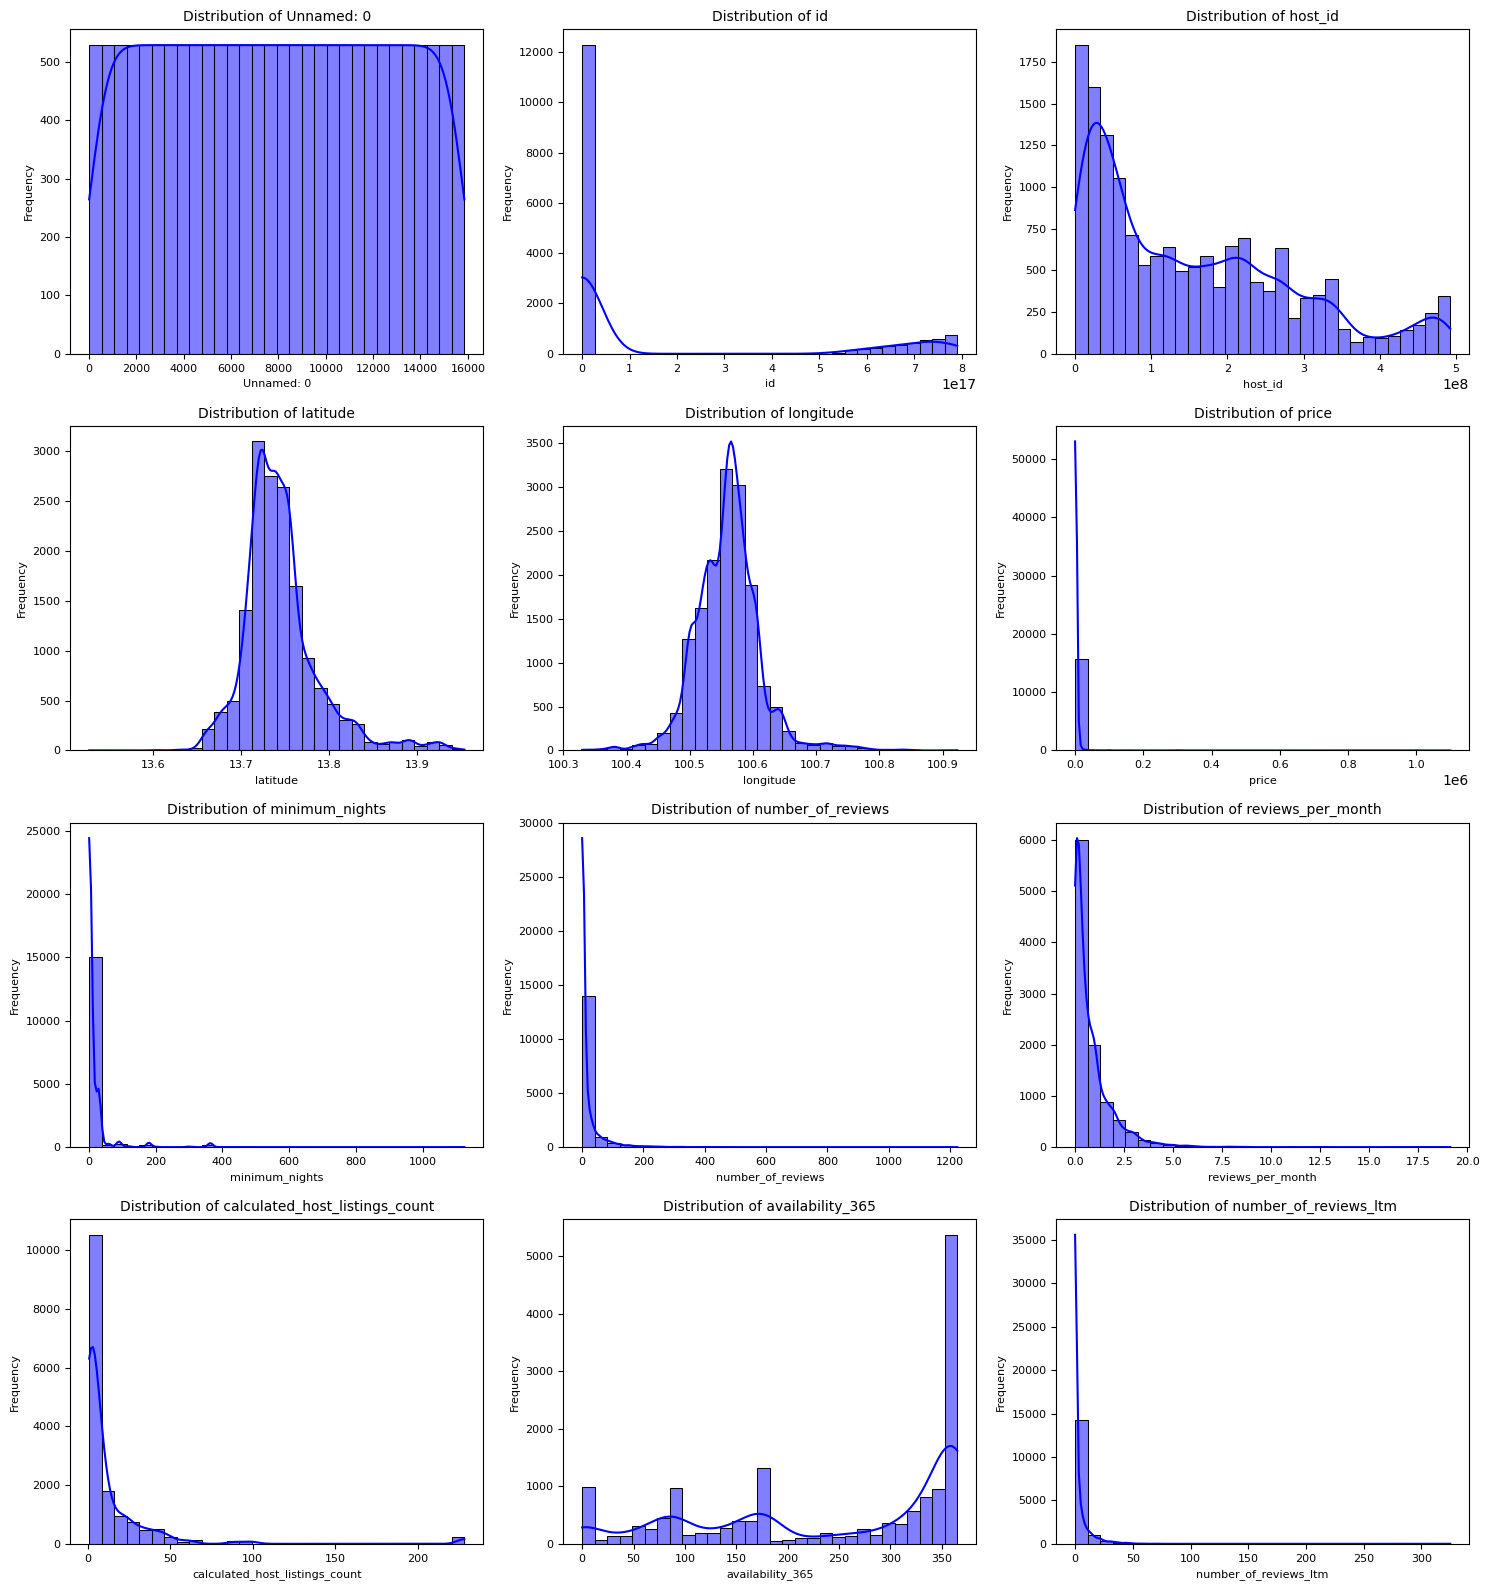

In [193]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Define number of rows and columns for subplots
num_cols = len(numeric_columns)
cols = 3  # Number of columns in grid
rows = (num_cols // cols) + (num_cols % cols > 0)  # Calculate rows needed

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()  # Flatten to iterate easily

# Plot histograms for each numeric column
for i, col in enumerate(numeric_columns):
    sns.histplot(df[col], kde=True, bins=30, color="blue", ax=axes[i])
    axes[i].set_title(f"Distribution of {col}", fontsize=10)
    axes[i].set_xlabel(col, fontsize=8)
    axes[i].set_ylabel("Frequency", fontsize=8)
    axes[i].tick_params(axis='both', labelsize=8)

# Hide unused subplots if any
for i in range(len(numeric_columns), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()



Insight :
- id dan host_id
Distribusi sangat skewed ke kiri. Kemungkinan adalah pengenal unik.
 Tindakan: Biasanya tidak digunakan dalam analisis langsung, tetapi berguna untuk pengelompokan.
- latitude dan longitude
Distribusi normal yang menunjukkan lokasi geografis properti.
Tindakan: Dapat digunakan untuk visualisasi peta atau analisis geospasial.
- price
Distribusi skewed ke kanan dengan banyak nilai kecil dan beberapa outlier besar.
Tindakan:
Lakukan analisis lebih lanjut untuk mendeteksi outlier (bisa pakai IQR atau z-score).
Mungkin memerlukan log-transform untuk normalisasi.
- minimum_nights
Sangat skewed ke kanan, mayoritas properti memiliki batas minimum malam sangat rendah.
Tindakan:
Identifikasi batas maksimum yang wajar, dan analisis properti dengan nilai ekstrem.
- number_of_reviews dan reviews_per_month
Distribusi skewed, dengan sebagian besar properti memiliki sedikit ulasan.
Tindakan:
Analisis ulasan properti populer vs tidak populer.
Pertimbangkan untuk membagi properti berdasarkan kuantitas ulasan.
- calculated_host_listings_count
Beberapa host memiliki banyak listing, tetapi sebagian besar hanya satu.
Tindakan:
Kelompokkan host berdasarkan jumlah listing (misalnya, host kecil vs besar).
- availability_365
Distribusi menunjukkan banyak properti memiliki nilai 0 atau 365.
Tindakan:
Analisis properti yang selalu tersedia (365) vs yang tidak aktif (0).
- number_of_reviews_ltm
Skewed ke kanan, menunjukkan sebagian besar properti memiliki sedikit ulasan terbaru.
Tindakan:
Bisa digunakan untuk mengidentifikasi properti populer akhir-akhir ini.


#### Uji Statistika

In [194]:
# Pilih kolom numerik untuk uji normalitas
numeric_cols = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
                'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']

# Lakukan uji Shapiro-Wilk untuk setiap kolom numerik
alpha = 0.05  # Tingkat signifikansi

for col in numeric_cols:
    shapiro_test = stats.shapiro(df[col].dropna())  # Hapus missing values
    p_value = shapiro_test.pvalue

    print(f"Uji Normalitas untuk kolom '{col}'")
    print(f"Nilai p-value: {p_value}")

    if p_value > alpha:
        print("Hipotesis nol diterima: Data berdistribusi normal")
    else:
        print("Hipotesis nol ditolak: Data tidak berdistribusi normal")
    print("-" * 30)

Uji Normalitas untuk kolom 'price'
Nilai p-value: 1.4396800095947464e-127
Hipotesis nol ditolak: Data tidak berdistribusi normal
------------------------------
Uji Normalitas untuk kolom 'minimum_nights'
Nilai p-value: 1.0652328336140456e-119
Hipotesis nol ditolak: Data tidak berdistribusi normal
------------------------------
Uji Normalitas untuk kolom 'number_of_reviews'
Nilai p-value: 7.343043476264459e-113
Hipotesis nol ditolak: Data tidak berdistribusi normal
------------------------------
Uji Normalitas untuk kolom 'reviews_per_month'
Nilai p-value: 1.8778403002722375e-87
Hipotesis nol ditolak: Data tidak berdistribusi normal
------------------------------
Uji Normalitas untuk kolom 'calculated_host_listings_count'
Nilai p-value: 5.7998500778495485e-114
Hipotesis nol ditolak: Data tidak berdistribusi normal
------------------------------
Uji Normalitas untuk kolom 'availability_365'
Nilai p-value: 3.634561086896923e-83
Hipotesis nol ditolak: Data tidak berdistribusi normal
------

## MISSING VALUE

In [195]:
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

Unnamed: 0                         0.000000
id                                 0.000000
name                               0.050460
host_id                            0.000000
host_name                          0.006308
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       36.520752
reviews_per_month                 36.520752
calculated_host_listings_count     0.000000
availability_365                   0.000000
number_of_reviews_ltm              0.000000
dtype: float64

<Axes: >

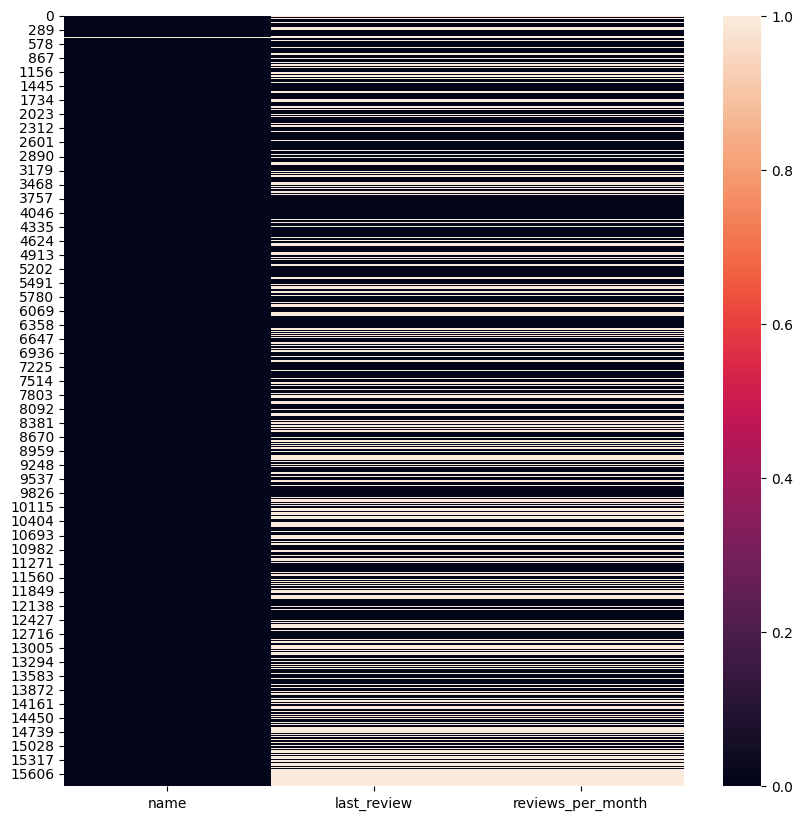

In [196]:
# Sebaran missing value di dalam data
plt.figure(figsize=(10,10))
sns.heatmap(df[['name','last_review','reviews_per_month']].isna())

Insight :
MISSING VALUE
*   di kolom name memiliki proporsi yang sangat kecil (0.050460)
*   di kolom last_review memiliki proporsi yang sangat tinggi (36.520752)

*   di kolom last_review berkaitan dengan kolom number_of_reviews. Jika data di number_of_reviews bernilai 0 (tidak ada review), maka data di last_review akan kosong.
*   di kolom reviews_per_month memiliki proporsi yang sama dengan kolom last_review(36.520752) karena kolom reviews_per_month kolom yang berkaitan dengan kolom last_review.





## Outliers

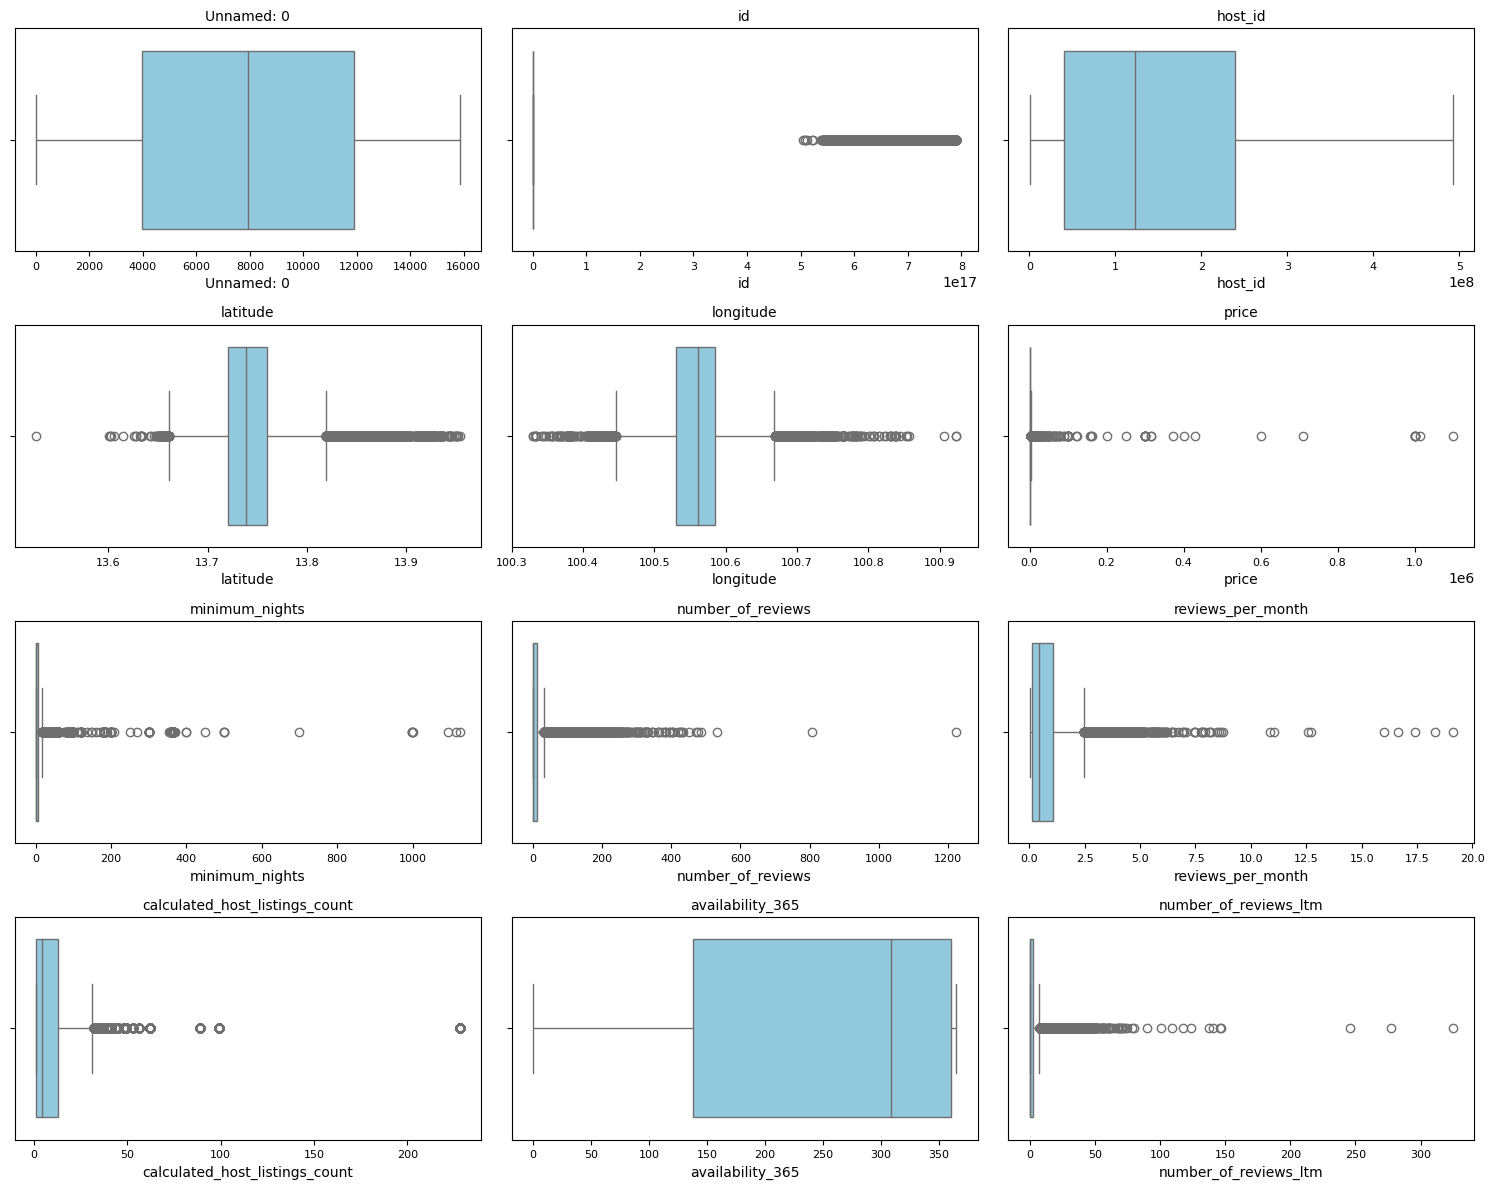

In [197]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pilih kolom numerik
numerik = df.select_dtypes(include='number')  # float dan int

# Tentukan jumlah baris dan kolom untuk subplots
num_cols = len(numerik.columns)
cols = 3  # Jumlah kolom dalam grid (bisa disesuaikan)
rows = (num_cols + cols - 1) // cols  # Hitung jumlah baris yang diperlukan

# Ukuran figure lebih kecil untuk lebih ringkas
plt.figure(figsize=(15, rows * 3))  # Lebar tetap, tinggi disesuaikan dengan jumlah baris

# Loop untuk setiap kolom numerik
posisi = 1
for kolom in numerik.columns:
    plt.subplot(rows, cols, posisi)  # (baris, kolom, posisi)
    sns.boxplot(x=df[kolom], color='skyblue')  # Boxplot dengan warna
    plt.title(kolom, fontsize=10)  # Tambahkan judul
    plt.xticks(fontsize=8)  # Ukuran font untuk ticks
    posisi += 1

# Tampilkan grafik
plt.tight_layout()  # Optimalkan jarak antar subplot
plt.show()


- Price: Harga menunjukkan adanya outlier yang signifikan pada nilai yang sangat tinggi (biasanya properti mewah atau luar biasa). Mayoritas harga properti berada pada kisaran yang lebih rendah, tetapi ada beberapa harga yang sangat tinggi, yang berpotensi mempengaruhi distribusi data secara keseluruhan.
- Minium_night: Ada beberapa properti yang memiliki persyaratan malam minimum yang sangat tinggi, yang tercermin sebagai outlier di sisi kanan boxplot. Kebanyakan properti memiliki persyaratan malam minimum yang lebih rendah, namun ada beberapa yang menetapkan persyaratan jauh lebih tinggi, seperti 100 malam atau lebih.
- number_of_reviews: Ada sejumlah outlier di sisi kanan, yang menunjukkan bahwa beberapa properti telah menerima ulasan yang sangat banyak. Kebanyakan properti memiliki jumlah ulasan yang lebih rendah, dengan beberapa mendapatkan ribuan ulasan.
- riview_per_month: Boxplot menunjukkan adanya banyak outlier pada sisi kanan, yang mengindikasikan bahwa beberapa properti menerima ulasan lebih sering daripada yang lain, dengan beberapa properti hampir tidak pernah mendapatkan ulasan per bulan.
- calculated_host_listings_count: Ada banyak outlier di sisi kanan, yang menunjukkan bahwa beberapa host memiliki banyak listing (lebih dari 100 atau bahkan lebih). Kebanyakan host hanya memiliki sedikit listing, dengan jumlah rata-rata yang rendah.
- availability_365 : Boxplot menunjukkan bahwa sebagian besar properti memiliki ketersediaan antara 50 hingga 365 hari dalam setahun. Namun, ada beberapa properti dengan ketersediaan yang sangat rendah, yang mungkin menunjukkan bahwa mereka hanya aktif pada musim tertentu

### IQR (Inter Quartile Range) * 1.5

In [198]:
# ambil numerik saja
numerik = df.select_dtypes(include = 'number')
list_jumlah_outliers = []
for kolom in numerik.columns:
    q3 = numerik.describe().loc['75%', kolom]
    q1 = numerik.describe().loc['25%', kolom]
    iqr = q3 - q1
    whis = 1.5 * iqr
    batas_atas = q3 + whis
    batas_bawah = q1 - whis

    # jumlah outliers
    jumlah_outliers = len(df[(df[kolom]>batas_atas) | (df[kolom]<batas_bawah)])
    list_jumlah_outliers.append(jumlah_outliers)

pd.DataFrame({
                'kolom': numerik.columns,
                'jumlah_outliers': list_jumlah_outliers
})

kolom  jumlah_outliers
0                       Unnamed: 0                0
1                               id             3571
2                          host_id                0
3                         latitude             1095
4                        longitude              602
5                            price             1403
6                   minimum_nights             3168
7                number_of_reviews             2240
8                reviews_per_month              693
9   calculated_host_listings_count             1832
10                availability_365                0
11           number_of_reviews_ltm             2219

- pada minimum night outlier tampaknya sangat tinggi, mengindikasikan bahwa listing mungkin memiliki kebijakan pemesanan yang tidak biasa

### Korelasi

In [199]:
# ambil numerik saja
numerik = df.select_dtypes(include = 'number')

numerik.corr()

Unnamed: 0        id   host_id  latitude  \
Unnamed: 0                        1.000000  0.730475  0.542168 -0.006432   
id                                0.730475  1.000000  0.342115 -0.019112   
host_id                           0.542168  0.342115  1.000000  0.052303   
latitude                         -0.006432 -0.019112  0.052303  1.000000   
longitude                         0.005771 -0.005326  0.002082  0.066314   
price                            -0.003401  0.000249 -0.008940 -0.008007   
minimum_nights                   -0.056473 -0.051638 -0.052760 -0.032981   
number_of_reviews                -0.297773 -0.179251 -0.218287 -0.020985   
reviews_per_month                 0.289055  0.397639  0.075731 -0.035798   
calculated_host_listings_count    0.151529  0.081070  0.020603 -0.044074   
availability_365                  0.014941  0.123134  0.033200  0.008887   
number_of_reviews_ltm             0.040168 -0.024465 -0.051474 -0.043814   

                                longitude     price  minimum_nights  \
Unnamed: 0                       0.005771 -0.003401       -0.056473   
id                              -0.005326  0.000249       -0.051638   
host_id                          0.002082 -0.008940       -0.052760   
latitude                         0.066314 -0.008007       -0.032981   
longitude                        1.000000 -0.004595        0.018291   
price                           -0.004595  1.000000        0.020155   
minimum_nights                   0.018291  0.020155        1.000000   
number_of_reviews               -0.028402 -0.004368       -0.034211   
reviews_per_month               -0.010723 -0.011497       -0.089948   
calculated_host_listings_count  -0.043822 -0.013299       -0.053596   
availability_365                -0.017956  0.000789        0.053174   
number_of_reviews_ltm           -0.021086 -0.014163       -0.079015   

                                number_of_reviews  reviews_per_month  \
Unnamed: 0                              -0.297773           0.289055   
id                                      -0.179251           0.397639   
host_id                                 -0.218287           0.075731   
latitude                                -0.020985          -0.035798   
longitude                               -0.028402          -0.010723   
price                                   -0.004368          -0.011497   
minimum_nights                          -0.034211          -0.089948   
number_of_reviews                        1.000000           0.512523   
reviews_per_month                        0.512523           1.000000   
calculated_host_listings_count           0.036338           0.069057   
availability_365                        -0.077229          -0.019477   
number_of_reviews_ltm                    0.499417           0.598638   

                                calculated_host_listings_count  \
Unnamed: 0                                            0.151529   
id                                                    0.081070   
host_id                                               0.020603   
latitude                                             -0.044074   
longitude                                            -0.043822   
price                                                -0.013299   
minimum_nights                                       -0.053596   
number_of_reviews                                     0.036338   
reviews_per_month                                     0.069057   
calculated_host_listings_count                        1.000000   
availability_365                                      0.008542   
number_of_reviews_ltm                                 0.111925   

                                availability_365  number_of_reviews_ltm  
Unnamed: 0                              0.014941               0.040168  
id                                      0.123134              -0.024465  
host_id                                 0.033200              -0.051474  
latitude                   

Insight :
1. Korelasi antara number_of_reviews dan reviews_per_month:
Korelasi positif yang cukup kuat (0.571886) antara number_of_reviews dan reviews_per_month menunjukkan bahwa properti dengan lebih banyak ulasan juga cenderung memiliki lebih banyak ulasan per bulan. Ini mungkin menunjukkan popularitas atau tingkat aktivitas yang lebih tinggi pada properti yang lebih sering mendapatkan ulasan.
2. Korelasi antara number_of_reviews_ltm dan reviews_per_month:
Korelasi positif (0.642971) antara number_of_reviews_ltm (ulasan dalam jangka waktu tertentu) dan reviews_per_month menunjukkan bahwa properti yang memiliki lebih banyak ulasan dalam jangka panjang juga cenderung memiliki lebih banyak ulasan setiap bulan. Hal ini mendukung hipotesis bahwa properti yang aktif mendapatkan ulasan lebih sering.
3. Korelasi antara price dan reviews_per_month:
Korelasi yang sangat lemah (-0.011567) antara price dan reviews_per_month menunjukkan bahwa harga properti tidak terlalu berpengaruh terhadap frekuensi ulasan yang diterima. Hal ini bisa berarti bahwa ulasan lebih dipengaruhi oleh faktor lain seperti kualitas layanan atau lokasi daripada harga.
4. Korelasi antara minimum_nights dan number_of_reviews_ltm:
Korelasi negatif yang lemah (-0.079023) antara minimum_nights dan number_of_reviews_ltm menunjukkan bahwa properti yang memiliki persyaratan malam minimum yang lebih tinggi mungkin cenderung memiliki ulasan yang lebih sedikit dalam jangka panjang. Ini bisa menunjukkan bahwa properti dengan persyaratan yang lebih ketat cenderung kurang disukai atau jarang disewa.
5. Korelasi antara calculated_host_listings_count dan number_of_reviews:
Korelasi negatif yang cukup kuat (-0.218264) antara calculated_host_listings_count (jumlah listing yang dimiliki oleh host) dan number_of_reviews menunjukkan bahwa host dengan lebih banyak listing cenderung memiliki ulasan yang lebih sedikit untuk setiap listing. Ini bisa berarti bahwa host yang memiliki banyak properti tidak mendapatkan ulasan sebanyak host dengan lebih sedikit properti.
6. Korelasi antara latitude dan longitude:
Korelasi positif yang sangat kecil (0.066315) menunjukkan bahwa lokasi geografis (latitude dan longitude) hampir tidak memiliki hubungan langsung yang kuat dengan variabel lain, meskipun kita bisa mengasumsikan bahwa properti yang lebih dekat dengan pusat kota atau tempat wisata mungkin akan memiliki lebih banyak ulasan.
7. Korelasi antara price dan availability_365:
Korelasi yang sangat lemah (0.000773) antara price dan availability_365 menunjukkan bahwa harga properti hampir tidak terkait dengan seberapa sering properti tersebut tersedia dalam setahun. Ini bisa berarti bahwa faktor harga bukanlah satu-satunya pertimbangan untuk ketersediaan properti sepanjang tahun.
8. Korelasi antara price dan calculated_host_listings_count:
Korelasi negatif yang lemah (-0.013303) menunjukkan bahwa harga dan jumlah listing yang dimiliki oleh host tidak berhubungan erat. Host dengan banyak listing tidak selalu menawarkan harga yang lebih murah atau lebih mahal.

Tindakan yang bisa diambil :
- Mengevaluasi Aktivitas Properti: Fokuskan analisis pada properti dengan lebih banyak ulasan (baik total ulasan atau ulasan per bulan) dan tingkatkan visibilitas atau promosi untuk properti-properti tersebut.
- Analisis Harga dan Ketersediaan: Cek lebih lanjut apakah harga berhubungan dengan ketersediaan properti atau tidak, dan tentukan apakah perlu menyesuaikan harga untuk meningkatkan permintaan atau ketersediaan.
- Menargetkan Host dengan Banyak Listing: Jika host memiliki banyak listing, ini bisa menunjukkan bahwa mereka memiliki banyak properti dengan sedikit ulasan per properti. Pertimbangkan untuk mengevaluasi bagaimana ulasan dapat ditingkatkan untuk setiap listing.
- Pertimbangan Lokasi: Lokasi tidak memiliki korelasi yang kuat dengan variabel lain, namun tetap penting untuk melihat bagaimana lokasi geografis dapat memengaruhi harga atau ulasan.

### Deskriptifff

In [200]:
# df.describe(include = 'object') # sama saja
df.describe(exclude = 'number')

name host_name  \
count                                              15846     15853   
unique                                             14794      5312   
top     New!  La Chada Night Market studio 2PPL near MRT     Curry   
freq                                                  45       228   

       neighbourhood        room_type last_review  
count          15854            15854       10064  
unique            50                4        1669  
top          Vadhana  Entire home/apt  2022-12-11  
freq            2153             8912         189

#### Unique Values

In [201]:
# ambil semua yg kategorik
kategorik = df.select_dtypes(include = 'object')

# hitung unique values masing2 variabel
kategorik.nunique()

name             14794
host_name         5312
neighbourhood       50
room_type            4
last_review       1669
dtype: int64

<Axes: >

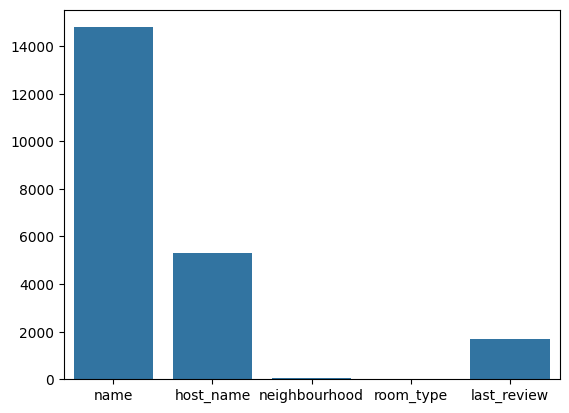

In [202]:
sns.barplot(kategorik.nunique())

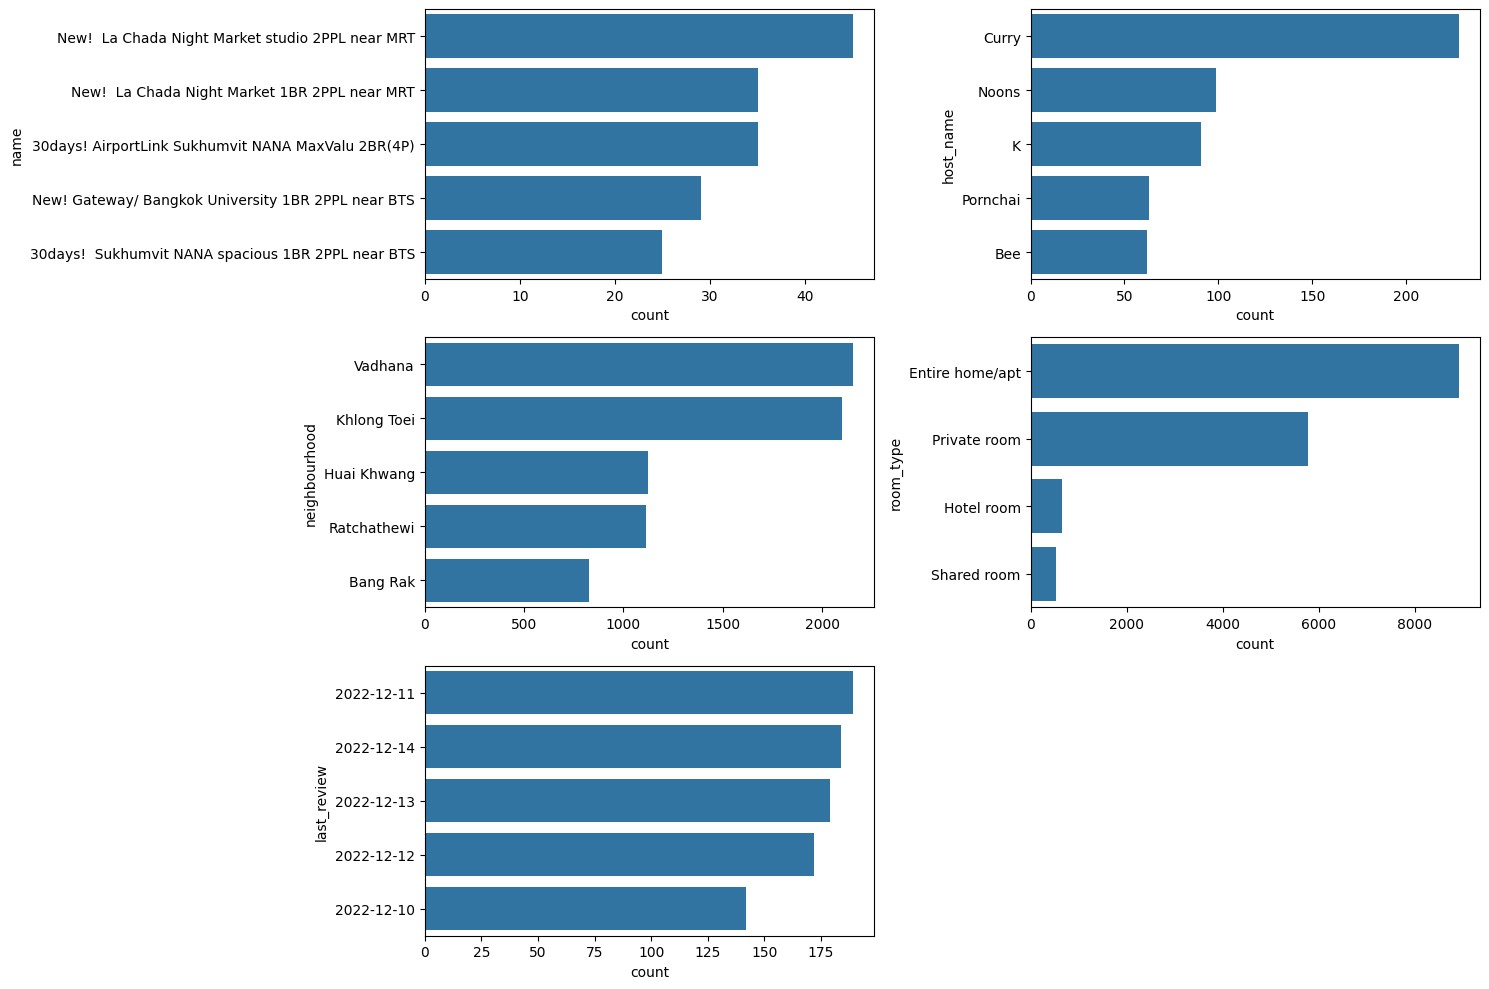

In [203]:
# ambil semua yg kategorik
kategorik = df.select_dtypes(include='object')

plt.figure(figsize=(15, 10))  # (kolom, bairs)
posisi = 1
# Define the number of rows and columns for the subplot grid
nrows = 3 # Changed from 2 to 3 to accommodate 5 plots
ncols = 2 # Kept as 2

# Calculate the total number of plots
total_plots = nrows * ncols

for i, kolom in enumerate(kategorik.columns):
    # Only plot if the current plot index is less than the total allowed plots
    if i < total_plots:
        plt.subplot(nrows, ncols, posisi)  # (baris, kolom, posisi)
        sns.barplot(df[kolom].value_counts().sort_values(ascending=False).head(5), orient='h')
        posisi += 1
        plt.tight_layout()  # biar tidak bertabrakan

# mengeprint grafik
plt.show()


## KESIMPULAN DATA UNDERSTANDING

# DATA CLEANING

### kolom unnnamed

In [204]:
# Saat file seperti CSV atau Excel diekspor, kolom kosong tanpa header sering dinamai otomatis oleh sistem sebagai "Unnamed".
# Menghapus kolom unnamed karna tidak relevan
df = df.drop(columns=['Unnamed: 0'])

### Host_Name

In [205]:
# mengganti nan di host_name menjadi unknown
df[df['host_name'].isna()]

id           name    host_id host_name neighbourhood  latitude  \
3571  19682464  Cozy Hideaway  137488762       NaN     Bang Kapi  13.76999   

      longitude     room_type  price  minimum_nights  number_of_reviews  \
3571  100.63769  Private room   1399               3                  1   

     last_review  reviews_per_month  calculated_host_listings_count  \
3571  2017-07-29               0.02                               1   

      availability_365  number_of_reviews_ltm  
3571               365                      0

In [206]:
df['host_name'].fillna('Unknown Host', inplace=True)


### Name

In [207]:
df[df['name'].isnull()]

id name   host_id        host_name neighbourhood  latitude  \
439    4549768  NaN  18852579          Titawan  Phra Khanong  13.69406   
544    4720818  NaN  24386225           Cherry     Din Daeng  13.77562   
572    4245018  NaN  22030043        Parichart    Bang Phlat  13.78376   
669    6148415  NaN  31895202            Chira       Bang Na  13.68276   
1030   8055144  NaN  42521288          Nantida       Vadhana  13.74126   
1282  10000742  NaN  51374914  Diamond Bangkok   Ratchathewi  13.75328   
1594  10710165  NaN  55347997      Khaneungnit       Vadhana  13.71757   
2075  13142743  NaN  73275200         Pakaphol   Khlong Toei  13.72566   

      longitude        room_type  price  minimum_nights  number_of_reviews  \
439   100.59619     Private room   1080               5                  0   
544   100.57346     Private room   1200               1                  0   
572   100.49821     Private room   1200               1                  0   
669   100.60894  Entire home/apt   2424               2                  0   
1030  100.55761     Private room   5000               3                  0   
1282  100.52928     Private room    930               1                  6   
1594  100.60464     Private room   1000               1                  0   
2075  100.56416     Private room    850               1                  2   

     last_review  reviews_per_month  calculated_host_listings_count  \
439          NaN                NaN                               1   
544          NaN                NaN                               1   
572          NaN                NaN                               1   
669          NaN                NaN                               1   
1030         NaN                NaN                               1   
1282  2017-05-13               0.07                               1   
1594         NaN                NaN                               1   
2075  2017-12-11               0.03                               3   

      availability_365  number_of_reviews_ltm  
439                365                      0  
544                365                      0  
572                365                      0  
669                365                      0  
1030               365                      0  
1282               365                      0  
1594               365                      0  
2075               220                      0

In [208]:
df['name'] = df['name'].fillna('undefined')

reason :

*   Terdapat 8 missing value di kolom tersebut, atau 0.05 persen dari proporsi total baris di kolom tersebut
*   Kita bisa mengisi dengan 'undefined' dikarenakan value di kolom nama memang beragam



### last_review

In [209]:
# Drop kolom 'last_review'
df = df.drop(columns=['last_review'])

reason :


*   Data pada kolom 'last_review' tidak akan kita butuhkan untuk kedepannya untuk dianalisis dikarenakan untuk mengetahui data yang berkaitan waktu dan review kedepannya sudah terwakili kolom 'review_per_month' dan "number_of_reviews".
*   Item daftar



###  review_per_month

In [210]:
# dilakukan pengisian nilai 0 pada kolom reviews_per_month yang memiliki missing value
# Fill missing values in 'reviews_per_month' with 0
df['reviews_per_month'].fillna(0, inplace=True)

- Terdapat missing value sejumlah 36.520752
- menanganinya dengan cara mengisi null value dengan 0
- karna memang tidak ada yang mengisi riview dibulan itu

In [211]:
# Melakukan pengecekan missing value, dapat dilihat tidak ada lagi missing value
df.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

### Finding and handling data with 0 values

In [212]:
def find_col_value_zero(data_frame):
    zeros_column = (data_frame == 0).sum()
    return zeros_column[zeros_column > 0]

columns_with_zeros = find_col_value_zero(df)
print('Dalam Angka Bulat:')
print(columns_with_zeros)
print()
print('Dalam Persentase:')
print(columns_with_zeros/df.shape[0])


Dalam Angka Bulat:
price                       1
number_of_reviews        5790
reviews_per_month        5790
availability_365          857
number_of_reviews_ltm    9220
dtype: int64

Dalam Persentase:
price                    0.000063
number_of_reviews        0.365208
reviews_per_month        0.365208
availability_365         0.054056
number_of_reviews_ltm    0.581557
dtype: float64


#### 0 value pada price

Menghapus nilai 0 pada kolom price
sebenarny bisa juga mengahandle zero value pada price dengan memediankan

df = df[df['price'] != 0]

In [213]:
# Menghapus nilai 0 pada kolom price
# sebenarny bisa juga mengahandle zero value pada price dengan memediankan

df = df[df['price'] != 0]

#### 0 value pada availability_365  
- Untuk menangani nilai ini, kita akan membiarkan nilai 0, karena nilai 0 ini menandakan tempat tersebut sudah di-booking, dan bisa jadi telah dibooking dengan Long-Term Rental yang menandakan room tersebut sudah dipesan lebih dari 6 bulan

#### 0 value pada 'number_of_reviews'


- Untuk menangani nilai ini, kita akan membiarkan nilai 0
karena nilai 0 ini menandakan tidak ada reviewnya di tempat tersebut.




#### 0 value pada number_of_reviews_ltm

kolom ini memiliki 5784 nilai yang sama dengan 0. Hal ini dikarenakan data tersebut berasal dari review_per_month

In [214]:
df = df.drop(columns=['number_of_reviews_ltm'])

- menghapus kolom number_of_reviews_ltm karna sudah cukup terwakilkan kolom review_per_month dan juga untuk mengurangi redudancy

### Cek Duplicate

In [215]:
# Cek duplikasi dalam data
df.duplicated().value_counts()

False    15853
Name: count, dtype: int64

In [216]:
# Duplikat berdasarkan lokasi, neighbourhood, last_review, harga, nama, dan room type
data_duplicate = df[df.duplicated(subset=['latitude', 'longitude', 'neighbourhood', 'price', 'name', 'room_type'], keep=False)]
display('Jumlah data duplikat:', len(data_duplicate))
data_duplicate.head()

'Jumlah data duplikat:'

68

id                                              name   host_id  \
486    4639962  Sukhumvit, 5 min walk to Sky Train Asoke Station  24021888   
1162   7717620  Sukhumvit, 5 min walk to Sky Train Asoke Station  24021888   
2119  13777582   Studio with Zen garden view (30sqm), LUXX Silom  68154488   
3329  18396802              Studio for 2PAX: 1-Min from BTS Nana   3773805   
3473  19000129              Studio for 2PAX: 1-Min from BTS Nana   3773805   

                       host_name neighbourhood  latitude  longitude  \
486   Maitria Hotel Sukhumvit 18   Khlong Toei  13.73313  100.56259   
1162  Maitria Hotel Sukhumvit 18   Khlong Toei  13.73313  100.56259   
2119                     Dusadee      Bang Rak  13.72633  100.52531   
3329             Danai And BicGy   Khlong Toei  13.73937  100.55521   
3473             Danai And BicGy   Khlong Toei  13.73937  100.55521   

            room_type  price  minimum_nights  number_of_reviews  \
486      Private room   4871               1                 27   
1162     Private room   4871               1                 20   
2119       Hotel room   1777               1                  1   
3329  Entire home/apt   2470               2                 63   
3473  Entire home/apt   2470               2                 71   

      reviews_per_month  calculated_host_listings_count  availability_365  
486                0.28                              12               364  
1162               0.30                              12               364  
2119               0.01                              62               271  
3329               0.93                              13               325  
3473               1.06                              13               343

In [217]:
data_duplicate.groupby(['name','latitude','longitude','host_name'])[['id']].count()

id
name                                               latitude  longitude  host_name                     
15days!New!Bang Phlat MRT 600m/swiming pool/gym    13.788938 100.503600 Curry                        2
30days!  Sukhumvit NANA spacious 1BR 2PPL near BTS 13.750300 100.555503 Kara                         1
                                                                        Nana                         1
                                                                        Noons                        1
30days! Sukhumvit NANA spacious 2BR 4PPL near BTS  13.750300 100.555503 Curry                        2
Budget Hotel in Center of Bangkok @HAP             13.720197 100.548159 Tachin                       2
Family Room for 4 People                           13.740168 100.556320 Rachan                       2
Luxury 1 Bed/Central Rama9/Jodds Fair/Phra ram9    13.756184 100.568269 Tricia                       1
                                                                        Willam                       2
                                                   13.757097 100.568486 Alice                        2
NA BANGLAMPOO GUEST HOUSE                          13.762790 100.497900 Yui                          2
New!  city center / ASOK Station / 2PPL 1BR        13.723233 100.561119 Curry                        1
                                                                        Nana                         1
New! Gateway/ Bangkok University 1BR 2PPL near BTS 13.716669 100.584967 Nana                         3
                                                                        Noons                        1
                                                   13.716847 100.584781 Curry                        5
                                                                        Nana                         1
                                                                        Noons                        2
ONLY 10 min walk BTS Ari / BAANNUENG @ari5[Suite]  13.780780 100.539720 First                        2
One Siam/Platinum Fashion Mall/Mrt Arl Bts/MBK/GYM 13.756598 100.540777 Curry                        2
Private Room in Sukhumvit: BTS Phrom Phong         13.729510 100.572447 Apichaya                     2
Sale! BTS On Nut/Sukhumvit 87/loft/pool/gym/wifi   13.701565 100.603293 Curry                        3
                                                                        Nana                         1
Sathon Luxury 2 br/China Town/Icon Siam            13.710777 100.519891 Alex                         1
                                                                        Alice                        3
                                                                        Tricia                       3
                                                                        Willam                       2
Sathon Luxury Loft/China Town/Icon Siam            13.710777 100.519891 Alex                         2
                                                                        Alice                        1
Studio for 2PAX: 1-Min from BTS Nana               13.739370 100.555210 Danai And BicGy              2
Studio with Zen garden view (30sqm), LUXX Silom    13.726330 100.525310 Dusadee                      2
Sukhumvit, 5 min walk to Sky Train Asoke Station   13.733130 100.562590 Maitria Hotel Sukhumvit 18   2
The Lux Ladprao 10                                 13.809450 100.566340 Visani                       2
The Lux Ladpraw 10                                 13.809450 100.566340 Visani                       2
White House Hostel Deluxe Room Shared Bathroom     13.753400 100.538220 Piti                         2
small1                                             13.920720 100.575780 Soo                          2

In [218]:
# Drop Duplicate Data
df.drop_duplicates(subset=['longitude', 'latitude','price','name','room_type'], keep='first', inplace=True, ignore_index=False)

Insight :
- Pada data duplikat di atas, dapat dilihat bahwa properti dengan nama yang sama serta koordinat lintang dan bujur yang serupa terdaftar dengan nama yang berbeda. Namun, properti ini sebenarnya identik, seperti yang dibuktikan oleh harga yang sama, ulasan terbaru, dan jenis properti yang serupa. Situasi ini dapat menyebabkan konflik dalam pemesanan. Artinya, ketika seseorang telah memesan properti tertentu, dan orang lain mencoba untuk memesan properti yang sama, aplikasi akan menunjukkan bahwa ada dua properti (padahal sebenarnya hanya satu) yang tersedia untuk disewakan. Akibatnya, orang kedua mungkin salah mengira bahwa properti tersebut masih tersedia untuk disewakan, padahal sudah dipesan oleh orang lain.

## menambahkan kolom area

In [219]:
# membuat kolom area
def label(neighbourhood):
    if neighbourhood in ['Bang Phlat','Chatu Chak','Bang Sue','Dusit','Bang Rak','Bangkok Noi',
                                'Bangkok Yai','Khlong Toei','Ratchathewi','Parthum Wan','Pom Prap Sattru Phai','Phra Nakhon','Phaya Thai','Huai Khwang','Din Daeng','Sathon','Khlong San','Thon buri','Bang Kho laen','Yan na wa','Samphanthawong','Vadhana']:
        return 'Inner'
    elif neighbourhood in ['Taling Chan','Thawi Watthana','Nong Khaem','Lak Si','Don Mueang',
                                  'Sai Mai','Bang Kapi','Lat Phrao','Bang Khen','Bueng Kum','Chom Thong',
                                  'Bang Na','Pra Wet','Suanluang','Saphan Sung','Khan Na Yao','Wang Thong Lang',
                                  'Thung khru','Bang Khae','Phra Khanong','Rat Burana','Phasi Charoen']:
        return 'Urban Fringe'
    elif neighbourhood in ['Nong Chok','Lat Krabang','Min Buri','Khlong Sam Wa','Bang Khun thain',
                                  'Bang Bon']:
        return 'Suburban'
    else:
        return 'Unknown'

df['area'] = df['neighbourhood'].apply(label)

- penambahan kolom area

## Outliers


#### Analisis pada price

In [220]:
# ambil numerik saja
numerik = df.select_dtypes(include = 'number')
list_jumlah_outliers = []
for kolom in numerik.columns:
    q3 = numerik.describe().loc['75%', kolom]
    q1 = numerik.describe().loc['25%', kolom]
    iqr = q3 - q1
    whis = 1.5 * iqr
    batas_atas = q3 + whis
    batas_bawah = q1 - whis

    # jumlah outliers
    jumlah_outliers = len(df[(df[kolom]>batas_atas) | (df[kolom]<batas_bawah)])
    list_jumlah_outliers.append(jumlah_outliers)

pd.DataFrame({
                'kolom': numerik.columns,
                'jumlah_outliers': list_jumlah_outliers
})

kolom  jumlah_outliers
0                              id             3537
1                         host_id                0
2                        latitude             1096
3                       longitude              602
4                           price             1397
5                  minimum_nights             3167
6               number_of_reviews             2239
7               reviews_per_month             1462
8  calculated_host_listings_count             1802
9                availability_365                0

In [221]:
# Melakukan filter untuk nilai maksimum pada kolom 'price'
min_price_data = df[df['price'] == 0.000000e+00]
min_price_data

Empty DataFrame
Columns: [id, name, host_id, host_name, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, reviews_per_month, calculated_host_listings_count, availability_365, area]
Index: []

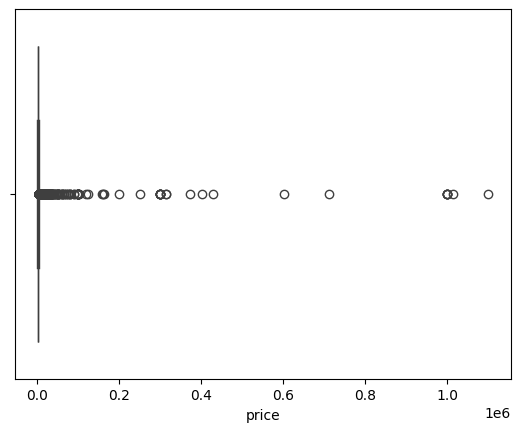

In [222]:
sns.boxplot(x=df['price'])
plt.show()

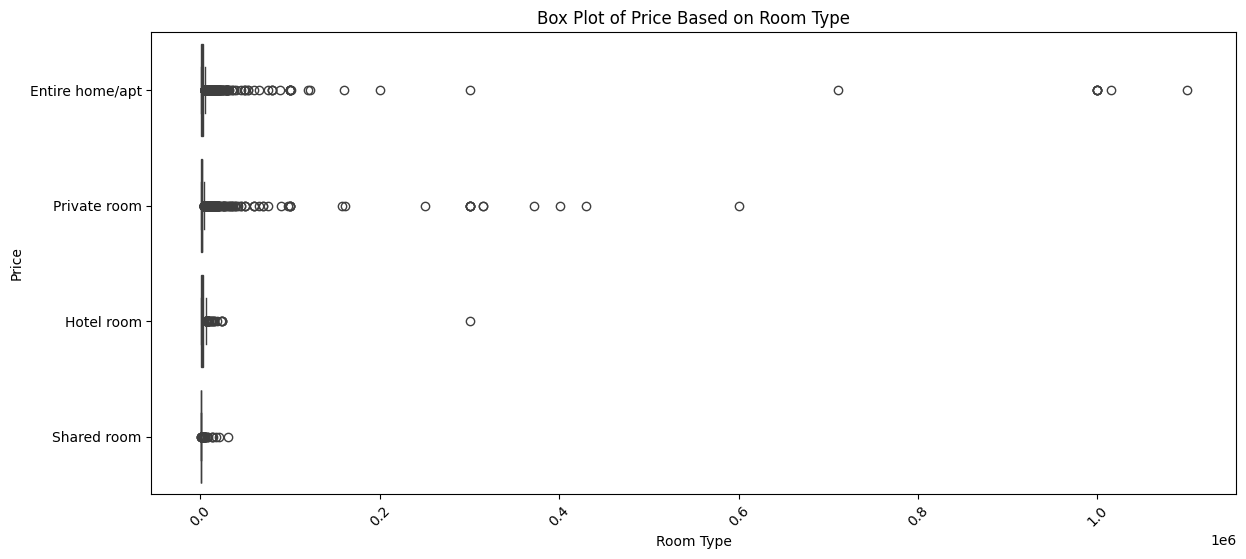

In [223]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, y='room_type', x='price')
plt.xticks(rotation=45)
plt.title('Box Plot of Price Based on Room Type')

plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()

In [224]:
df.groupby('room_type')['price'].max()

room_type
Entire home/apt    1100000
Hotel room          300000
Private room        600700
Shared room          31200
Name: price, dtype: int64

In [225]:
# Daftar tipe kamar yang ingin diperiksa
room_types = ['Entire home/apt', 'Private room', 'Hotel room', 'Shared room']

# Loop untuk memeriksa harga setiap tipe kamar
for room_type in room_types:
    price_room = df.query(f"room_type == '{room_type}'")[['price']].sort_values(by='price', ascending=False)
    print(f"--- Harga untuk {room_type} ---")
    display(price_room.head())
    display(price_room.tail())



--- Harga untuk Entire home/apt ---


price
12868  1100000
12300  1014758
6289   1000000
4620   1000000
9345   1000000

price
11215    348
1481     346
9657     346
5246     337
10222    332

--- Harga untuk Private room ---


price
4373   600700
11885  429443
12792  400717
6549   372227
6760   314899

price
11663    315
7831     310
8974     304
9529     300
15551    278

--- Harga untuk Hotel room ---


price
2668  300000
3415   24390
6281   23671
6283   23629
6282   23029

price
4561    330
8445    326
2748    318
8983    318
2770    318

--- Harga untuk Shared room ---


price
7857  31200
6868  20895
2430  17316
5577  13852
5079  13000

price
9636     303
15473    295
15456    280
15401    280
15455    280

Insight :
- Outlier yang muncul di semua kategori kamar mungkin disebabkan oleh pemilik listing yang menetapkan harga tinggi untuk properti yang mereka tawarkan.

In [226]:
# cek harga semua type kamar
df.groupby('room_type')['price'].describe()

count         mean           std    min     25%     50%  \
room_type                                                                   
Entire home/apt  8880.0  3470.396734  30130.466349  332.0  1025.0  1529.0   
Hotel room        646.0  3038.405573  12042.751324  318.0   997.0  1700.0   
Private room     5762.0  3066.081222  17307.775963  278.0   800.0  1212.0   
Shared room       522.0   920.848659   2149.875711  280.0   390.0   500.0   

                     75%        max  
room_type                            
Entire home/apt  2571.00  1100000.0  
Hotel room       3172.25   300000.0  
Private room     2092.00   600700.0  
Shared room       650.00    31200.0

In [227]:

# Filter the DataFrame to show prices between 800000 and 1000000
filtered_df = df[(df['price'] >= 600000) & (df['price'] <= 1200000)]

# Display the filtered DataFrame
filtered_df

id                                                name  \
1239              8880974                  Modern,wifi,5m MRT&2 Shopping Mall   
1779             11579635                  2 Bedroom,wifi,5mMRT&Shopping Mall   
4373             22633450                                 rm 1 : cozy & comfy   
4620             23740993        Modern&Luxury apartment,5min to MRT,freeWifi   
6289             29909847        BTS轻轨线on nut站，全新一房一厅，临Tesco商场市集!New cozy 1BR   
9345             39858231                 1BR cozy condo  close to ONNUT BTS.   
12300  562972065309061724  3B中文No Guest Service Fee@Nana Asok/Soi11 Nightlife   
12868  635676064543597376               New 1 bedroom apartment BTS MRT Asoke   
15200  766201549677186657       80米轻轨站，空中泳池+健身房，I con siam沙吞河景圈，距离大皇宫4公里，乳胶床垫   

         host_id host_name neighbourhood   latitude   longitude  \
1239    30803267   Yasmine   Huai Khwang  13.759950  100.569360   
1779    30803267   Yasmine   Huai Khwang  13.754710  100.565980   
4373   117057915      Jeab    Bang Phlat  13.791630  100.490380   
4620    30803267   Yasmine   Huai Khwang  13.760650  100.568980   
6289   210559448      Cora   Khlong Toei  13.703330  100.592470   
9345   210559448      Cora   Khlong Toei  13.704960  100.591510   
12300  131427125        Jj       Vadhana  13.746660  100.559100   
12868   12464705     Lucio       Vadhana  13.742186  100.560394   
15200   28589379      Lily    Khlong San  13.721270  100.495270   

             room_type    price  minimum_nights  number_of_reviews  \
1239   Entire home/apt  1000000             100                 45   
1779   Entire home/apt  1000000             100                 53   
4373      Private room   600700               1                  9   
4620   Entire home/apt  1000000               1                 12   
6289   Entire home/apt  1000000               2                 69   
9345   Entire home/apt  1000000              25                  2   
12300  Entire home/apt  1014758              30                  2   
12868  Entire home/apt  1100000              14                  0   
15200  Entire home/apt   710760              12                  0   

       reviews_per_month  calculated_host_listings_count  availability_365  \
1239                0.51                               4               180   
1779                0.64                               4               249   
4373                0.17                               5               330   
4620                0.22                               4               336   
6289                1.39                               6                90   
9345                0.05                               6                88   
12300               0.32                              10                75   
12868               0.00                               1               365   
15200               0.00                               1               313   

        area  
1239   Inner  
1779   Inner  
4373   Inner  
4620   Inner  
6289   Inner  
9345   Inner  
12300  Inner  
12868  Inner  
15200  Inner

Insight :
- Outliers yang terjadi pada semua tipe kamar bisa saja terjadi karena listing dapat memberikan harga yang tinggi untuk properti yang disewakan.
- harga yang sangat tinggi

#### Outliers Minimum Night

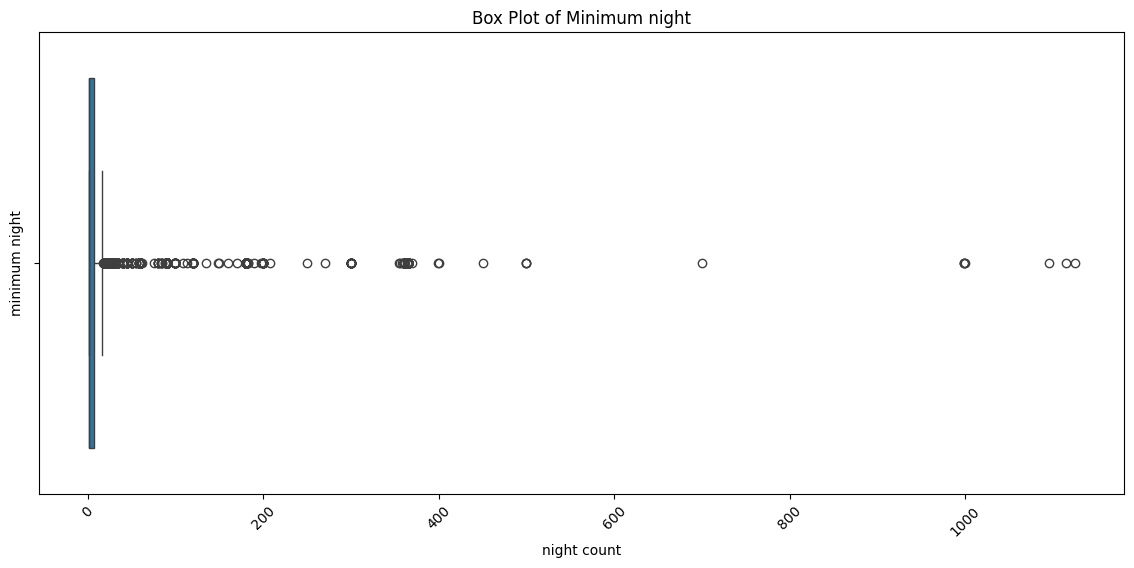

In [228]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='minimum_nights')
plt.xticks(rotation=45)
plt.title('Box Plot of Minimum night')
plt.xlabel('night count')
plt.ylabel('minimum night')
plt.show()

In [229]:
min_nights_above_365 = df[df['minimum_nights'] > 365]
min_nights_above_365

id                                                name  \
61      1041976   Long-stay special rate spacious entire floor Siam   
324     2489610   NEW 65Sqm 2BD 2BR Sukhumvit26 Emquartier Emporium   
1134    7625178                                        วิวล่า สิขลา   
1200    8801560                  30th floor, 10 min to BTS, Seaview   
1592   10709131                 34Fl 2, M Ladprao Condo,MRT & Malls   
1833   12046101                    Near BTS Onnut Convenience house   
3694   19893829                  2 Bedroom Suite@Kirthana Residence   
4194   22059876                                                   C   
7986   35165443         Wonderful apartment for you holiday in Thai   
8608   37270784                    นพกรณ์ แมนชั่น Noppakorn Mansion   
10153  41623113  blossom condo舒适双床房摩天轮夜市周边免费泳池健身房@Sathon surasakBTS   
10644  42685153                The Prime Sukhumvit 11 - Room 29/150   
11243  45051929    Bellevue Boutique Bangkok | Airport Link HUA-MAK   
11416  48046291                                 โฮมสเตย์บ้านมิตรภาพ   
11524  49032568          Freehold  Condo near Bangsue Grand Station   

         host_id  host_name neighbourhood  latitude  longitude  \
61       5735895     Pariya   Parthum Wan  13.74814  100.52016   
324     12743033     Thanan   Khlong Toei  13.72699  100.56988   
1134    39999413     อัครพล       Vadhana  13.74159  100.57977   
1200     4517723   Kannicha       Bang Na  13.66417  100.64955   
1592    32398198  Touchapon    Chatu Chak  13.81699  100.56292   
1833    22676472       Kuan     Suanluang  13.71161  100.60344   
3694    64131143     Chetna       Vadhana  13.73917  100.56616   
4194   160989331  Annchalee     Thon buri  13.71693  100.48330   
7986    86991723       Yang       Bang Na  13.67260  100.60352   
8608   271222372  Noppakorn     Lat Phrao  13.81852  100.59248   
10153  162537040    Songnya        Sathon  13.71195  100.52055   
10644  337709866     Vatiaz       Vadhana  13.74426  100.55758   
11243  165329146   Sataporn     Suanluang  13.73633  100.63836   
11416  387329237      ไตรทศ         Dusit  13.78270  100.51733   
11524    4661237   Chayanid      Bang Sue  13.80697  100.52362   

             room_type   price  minimum_nights  number_of_reviews  \
61     Entire home/apt    2900            1125                295   
324    Entire home/apt    2043             370                 23   
1134      Private room   65000             399                  0   
1200   Entire home/apt   35000             998                 20   
1592   Entire home/apt     760             700                 61   
1833   Entire home/apt    1300             500                  2   
3694   Entire home/apt    7286             500                  0   
4194      Private room  161516             500                  3   
7986   Entire home/apt    2000            1115                  0   
8608   Entire home/apt     450             450                  0   
10153  Entire home/apt     650            1000                  2   
10644     Private room   15143             999                  0   
11243     Private room    1314             999                  0   
11416     Private room     400             400                  0   
11524  Entire home/apt     554            1095                  0   

       reviews_per_month  calculated_host_listings_count  availability_365  \
61                  2.61                               3                 0   
324                 0.23                               2               365   
1134                0.00                               1               365   
1200                0.26                               7               365   
1592                0.73                               2               364   
1833                0.02                               3               363   
3694                0.00                               3                48   
4194                0.05                               1                 0   
7986        

In [230]:
# Daftar tipe kamar yang ingin diperiksa
room_types = ['Entire home/apt', 'Private room', 'Hotel room', 'Shared room']

# Loop untuk memeriksa minimum malam setiap tipe kamar
for room_type in room_types:
    min_nights = df.query(f"room_type == '{room_type}'")[['minimum_nights']].sort_values(by='minimum_nights', ascending=False)
    print(f"--- Minimum Malam untuk {room_type} ---")
    display(min_nights.head())
    display(min_nights.tail())



--- Minimum Malam untuk Entire home/apt ---


minimum_nights
61               1125
7986             1115
11524            1095
10153            1000
1200              998

minimum_nights
5986                1
11507               1
11510               1
11512               1
8933                1

--- Minimum Malam untuk Private room ---


minimum_nights
10644             999
11243             999
4194              500
11416             400
1134              399

minimum_nights
5726                1
5728                1
5733                1
5734                1
15853               1

--- Minimum Malam untuk Hotel room ---


minimum_nights
8205             113
7634              60
5887              30
4879              30
7328              28

minimum_nights
4828               1
4839               1
4842               1
4851               1
9145               1

--- Minimum Malam untuk Shared room ---


minimum_nights
3387              365
10211             365
10111             365
2175               90
2928               60

minimum_nights
4153                1
4152                1
4142                1
4140                1
15828               1

In [231]:
# Find areas where the minimum nights are high (e.g., above a certain threshold)
threshold = 365  # Example threshold, adjust as needed
high_min_nights_areas = df[df['minimum_nights'] > threshold].groupby('neighbourhood')['minimum_nights'].count()

# Print or visualize the results
print("Areas with high minimum nights:")
high_min_nights_areas


Areas with high minimum nights:


neighbourhood
Bang Na        2
Bang Sue       1
Chatu Chak     1
Dusit          1
Khlong Toei    1
Lat Phrao      1
Parthum Wan    1
Sathon         1
Suanluang      2
Thon buri      1
Vadhana        3
Name: minimum_nights, dtype: int64

In [232]:
# Display the 'Bang Na' neighbourhood data
bang_na_data = df[df['neighbourhood'] == 'Bang Na']
bang_na_data.head()

id                                       name  host_id host_name  \
1      27979             Easy going landlord,easy place   120541       Emy   
60   1898332  Apr. for rent full fur 1 bedroom, monthly  4837310     Veesa   
64   1926489             Ideo Blucove Sukhumvit Bangkok  9434109    Sander   
67   1057173        IdeoMix, Sukhumvit RD, close to BTS  5822937      Piya   
132   688013        1 BR Near BTS WIFI/POOL/FITNESS (B)  1780407       Feb   

    neighbourhood  latitude  longitude        room_type  price  \
1         Bang Na  13.66818  100.61674     Private room   1316   
60        Bang Na  13.67805  100.62451     Private room    400   
64        Bang Na  13.67998  100.61074  Entire home/apt   1500   
67        Bang Na  13.67991  100.61055  Entire home/apt    922   
132       Bang Na  13.67926  100.61655  Entire home/apt    808   

     minimum_nights  number_of_reviews  reviews_per_month  \
1                 1                  0               0.00   
60              180                  0               0.00   
64               29                  0               0.00   
67               14                170               1.54   
132              29                147               1.18   

     calculated_host_listings_count  availability_365          area  
1                                 2               358  Urban Fringe  
60                                1               364  Urban Fringe  
64                                1               365  Urban Fringe  
67                                1               219  Urban Fringe  
132                               6               317  Urban Fringe

Insight :    
- minimum night yang tinggi

# PERSIAPAN

In [233]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split


In [234]:
# Memuat dataset
df = pd.read_csv('cleaned_dataV4.csv')


In [235]:
import geopandas as gpd

gdf = gpd.read_file('neighbourhoods.geojson')
# gdf.drop(columns='neighbourhood_group', inplace=True)
# gdf.sample()

Dengan mengelompokkan lingkungan ke dalam kategori yang lebih luas, analisis data menjadi lebih sederhana dan lebih mudah dipahami.
Fungsi ini mengelompokkan nama lingkungan ke dalam tiga kategori:
Inner City: Lingkungan yang terletak di pusat kota, biasanya lebih padat dan memiliki akses yang lebih baik ke fasilitas dan layanan.
Urban Fringe: Lingkungan yang berada di pinggiran kota, yang mungkin memiliki karakteristik campuran antara perkotaan dan suburban.
Suburban Area: Lingkungan yang lebih jauh dari pusat kota, biasanya lebih tenang dan memiliki lebih banyak ruang terbuka

Referensi Pembuatan Area Bangkok: https://doi.org/10.3390/rs12223802 , Department of City Planning. Final Report of the Project on BMA Central City Planning; Department of City Planning BMA: Bangkok, Thailand, 2011. (In Thai)

## Klasifikasi Area

In [236]:
# Fungsi untuk mengklasifikasikan kategori area berdasarkan nama lingkungan
def classify_area(row):
    if row['neighbourhood'] in ['Bang Phlat', 'Chatu Chak', 'Bang Sue', 'Dusit', 'Bang Rak', 'Bangkok Noi',
                                 'Bangkok Yai', 'Khlong Toei', 'Ratchathewi', 'Pathum Wan', 'Pom Prap Sattru Phai',
                                 'Phra Nakhon', 'Phaya Thai', 'Huai Khwang', 'Din Daeng', 'Sathon',
                                 'Khlong San', 'Thon Buri', 'Bang Kho Laen', 'Yan Nawa', 'Samphanthawong',
                                 'Vadhana']:
        return 'Inner City'
    elif row['neighbourhood'] in ['Taling Chan', 'Thawi Watthana', 'Nong Khaem', 'Lak Si', 'Don Mueang',
                                   'Sai Mai', 'Bang Kapi', 'Lat Phrao', 'Bang Khen', 'Bueng Kum',
                                   'Chom Thong', 'Bang Na', 'Pra Wet', 'Suanluang', 'Saphan Sung',
                                   'Khan Na Yao', 'Wang Thong Lang', 'Thung Khru', 'Bang Khae',
                                   'Phra Khanong', 'Rat Burana', 'Phasi Charoen']:
        return 'Urban Fringe'
    elif row['neighbourhood'] in ['Nong Chok', 'Lat Krabang', 'Min Buri', 'Khlong Sam Wa',
                                   'Bang Khun Thain', 'Bang Bon']:
        return 'Suburban Area'
    else:
        return 'Not Classified'

# Menambahkan kolom baru 'area' ke DataFrame berdasarkan kategori yang ditentukan
gdf['area'] = gdf.apply(classify_area, axis=1)


# Menyimpan DataFrame yang telah diperbarui ke dalam format GeoJSON
gdf.to_file('updated_data.geojson', driver='GeoJSON')


In [237]:
df.head(2)

id                             name  host_id host_name neighbourhood  \
0  27934  Nice room with superb city view   120437    Nuttee   Ratchathewi   
1  27979   Easy going landlord,easy place   120541       Emy       Bang Na   

   latitude  longitude        room_type  price  minimum_nights  \
0  13.75983  100.54134  Entire home/apt   1905               3   
1  13.66818  100.61674     Private room   1316               1   

   number_of_reviews  reviews_per_month  calculated_host_listings_count  \
0                 65                0.5                               2   
1                  0                0.0                               2   

   availability_365          area  
0               353         Inner  
1               358  Urban Fringe

## Klasifikasi Minimum night

In [238]:
#membuat dataframe baru khusus untuk short-term dan long-term
df_stay = df

#Bar 1 = membuat kartegori setiap hari sampai hari ke 28+
plt.figure(figsize=(12, 5))
def categorize_nights(value):
    if value >= 28:
        return '28+ days'
    else:
        return f'{value}'
df_stay['night_category'] = df_stay['minimum_nights'].apply(categorize_nights)
custom_order = [
    f'{i}' for i in range(1, 28)
] + ['28+ days']
grouped_stay = df_stay['night_category'].value_counts().reindex(custom_order, fill_value=0)

<Figure size 1200x500 with 0 Axes>

## Penggabungan Geometri

In [239]:
# Mengelompokkan koordinat multipolygon berdasarkan kolom 'area'
grouped = gdf.groupby('area')['geometry'].apply(lambda x: list(x)).reset_index()

# Inisialisasi list untuk menyimpan geometri area yang telah digabung
combined_geometries = []

# Iterasi melalui setiap grup area
for index, row in grouped.iterrows():
    area_label = row['area']
    geometries = row['geometry']
    # Menggabungkan geometri area menjadi satu kesatuan
    combined_geometry = geometries[0]
    for geom in geometries[1:]:
        combined_geometry = combined_geometry.union(geom)
    # Menambahkan geometri yang telah digabung ke dalam list
    combined_geometries.append((area_label, combined_geometry))

# Membuat GeoDataFrame baru untuk peta Bangkok berdasarkan area
gdf_bangkok = gpd.GeoDataFrame(columns=['area', 'geometry'], crs=gdf.crs)
for area_label, geometry in combined_geometries:
    gdf_bangkok.loc[len(gdf_bangkok)] = {'area': area_label, 'geometry': geometry}

# Menyimpan GeoDataFrame yang telah dibuat ke dalam file GeoJSON
gdf_bangkok.to_file("bangkok_by_area.geojson", driver="GeoJSON")




In [240]:
df.head(3)

id                               name  host_id   host_name  \
0  27934    Nice room with superb city view   120437      Nuttee   
1  27979     Easy going landlord,easy place   120541         Emy   
2  28745  modern-style apartment in Bangkok   123784  Familyroom   

  neighbourhood  latitude  longitude        room_type  price  minimum_nights  \
0   Ratchathewi  13.75983  100.54134  Entire home/apt   1905               3   
1       Bang Na  13.66818  100.61674     Private room   1316               1   
2     Bang Kapi  13.75232  100.62402     Private room    800              60   

   number_of_reviews  reviews_per_month  calculated_host_listings_count  \
0                 65                0.5                               2   
1                  0                0.0                               2   
2                  0                0.0                               1   

   availability_365          area night_category  
0               353         Inner              3  
1               358  Urban Fringe              1  
2               365  Urban Fringe       28+ days

In [241]:
# prompt: mensave data baru yang udah di clean dalam bentuk csv

# Assuming 'df' is your cleaned DataFrame
df.to_csv('cleaned_airbnbf.csv', index=False)

In [242]:
# prompt: menampilkan 10 teratas
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(15810, 16)


dataFeatures dataType  null  unique  \
0                               id    int64     0   15810   
1                             name   object     0   14794   
2                          host_id    int64     0    6658   
3                        host_name   object     0    5312   
4                    neighbourhood   object     0      50   
5                         latitude  float64     0    9606   
6                        longitude  float64     0   10224   
7                        room_type   object     0       4   
8                            price    int64     0    3039   
9                   minimum_nights    int64     0      86   
10               number_of_reviews    int64     0     298   
11               reviews_per_month  float64     0     514   
12  calculated_host_listings_count    int64     0      50   
13                availability_365    int64     0     366   
14                            area   object     0       3   
15                  night_category   object     0      28   

                                                          uniqueSample  
0                                       [53570771, 740249119779253025]  
1   [Rachada Pavillion, Monthly Condo 5 minutes from BTS Nana Station]  
2                                                [144026161, 19886378]  
3                                                 [Sabye Bangkok, Aom]  
4                                                      [Dusit, Lak Si]  
5                                                 [13.84869, 13.80739]  
6                                               [100.54799, 100.61338]  
7                                           [Hotel room, Private room]  
8                                                         [3814, 1730]  
9                                                              [24, 4]  
10                                                            [51, 27]  
11                                                        [0.54, 1.23]  
12                                                            [10, 99]  
13                                                          [339, 310]  
14                                            [Suburban, Urban Fringe]  
15                                                              [1, 7]

In [243]:
df.shape

(15810, 16)

# ANALISA AREA

In [244]:
# Memuat dataset
df = pd.read_csv('cleaned_airbnbf.csv')


In [245]:
# Group by area dan hitung jumlah id
df_area = df.groupby('area')['id'].count().reset_index(name='count')
print("Jumlah Listing Airbnb berdasarkan Area")
df_area

Jumlah Listing Airbnb berdasarkan Area


area  count
0         Inner  12489
1      Suburban    283
2  Urban Fringe   3038

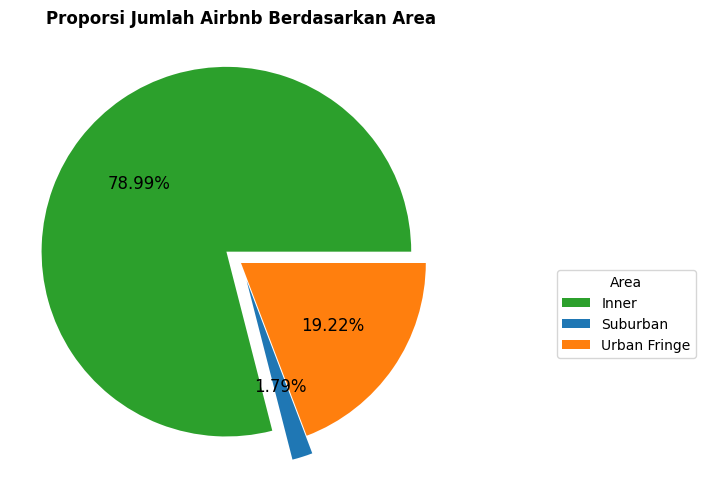

In [246]:
import matplotlib.pyplot as plt

# Define custom color palette
custom_palette = {
    'Suburban': '#1f77b4',  # Blue
    'Urban Fringe': '#ff7f0e',  # Orange
    'Inner': '#2ca02c'  # Green
}

# Create a list of colors based on the area
colors = [custom_palette[area] for area in df_area['area']]

# Pie chart jumlah Airbnb
plt.figure(figsize=(10, 6))
plt.pie(x=df_area['count'], autopct='%.2f%%',
        colors=colors,  # Apply the custom colors
        textprops={'color': 'black', 'fontname': 'DejaVu Sans', 'fontsize': 12},
        explode=(0.1, 0.1, 0))  # Adjust explode as needed

plt.legend(df_area['area'], title='Area', loc='upper right', bbox_to_anchor=(1.5, 0.5))
plt.title('Proporsi Jumlah Airbnb Berdasarkan Area', fontweight='bold')
plt.show()



- Sebagian besar listing berada di Inner Bangkok dengan proporsi 78.99% diikuti urban fringe 19.22% dan subruban 1.79%


In [247]:
import geopandas as gpd
import folium

# Load the GeoJSON file
gdf_bangkok = gpd.read_file("bangkok_by_area.geojson")
neighbourhood_geojson = gpd.read_file("neighbourhoods.geojson")

area_listings = {
    'Suburban': 283,
    'Urban Fringe ': 3041,
    'Inner': 12515
}

# Daftar koordinat tengah dan nama area
coordinates = {
    'Suburban': (13.862456729278676, 100.78387129734865),
    'Suburban ': (13.617888246897236, 100.42115253266931),
    'Urban Fringe': (13.781237618727946, 100.63827535044162),
    'Urban Fringe ': (13.71967597772107, 100.40014772469395),
    'Inner': (13.759345823315462, 100.53327283237591)
}

# Daftar warna dengan kontras tinggi untuk tiap area
area_colors = {
    'Suburban': 'blue',
    'Suburban ': 'yellow',
    'Urban Fringe': 'green',
    'Urban Fringe ': 'pink',
    'Inner': 'red'
}

# Buat peta dengan titik pusat Bangkok
m = folium.Map(location=[13.7563, 100.5018], zoom_start=11)

# Tambahkan GeoJSON data ke peta dengan warna berbeda
folium.GeoJson(
    gdf_bangkok,
    name="Bangkok Areas",
    style_function=lambda feature: {
        "fillColor": area_colors.get(feature['properties']['area'], "gray"),  # Warna berdasarkan area
        "color": "black",    # Warna border
        "weight": 2,         # Ketebalan border
        "fillOpacity": 0.6,  # Opasitas
    },
    tooltip=folium.GeoJsonTooltip(fields=["area"], aliases=["Area"]),
).add_to(m)

listings_per_neighbourhood = df.groupby('neighbourhood')['id'].count().reset_index(name='listing_count')
# Sorting nilai berdasarkan jumlah listing dari terendah ke tertinggi untuk setiap area
# Changed 'neighbourhood_listing_count' to 'listings_per_neighbourhood'
neighbourhood_listing_count_sorted = listings_per_neighbourhood.sort_values(by='listing_count', ascending=True)

# Gabungkan data listing_count ke dalam neighbourhood_geojson
neighbourhood_geojson = neighbourhood_geojson.merge(listings_per_neighbourhood, on='neighbourhood', how='left')

# Tambahkan chloropleth layer untuk jumlah id per neighbourhood
# Gunakan neighbourhood_geojson yang sudah digabung dengan listing_count
folium.Choropleth(
    geo_data=neighbourhood_geojson,
    name='Chloropleth',
    data=neighbourhood_geojson,  # Gunakan neighbourhood_geojson sebagai data
    columns=['neighbourhood', 'listing_count'],  # Kolom yang digunakan
    key_on='feature.properties.neighbourhood',
    fill_color='PuRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Jumlah Airbnb Listing di Bangkok',
    highlight=True,
    zoom_on_click=True,
    tooltip=folium.GeoJsonTooltip(fields=["neighbourhood", "listing_count"], aliases=["Neighbourhood", "Listing Count"]),  # Tambahkan listing_count ke tooltip
    popup=folium.GeoJsonPopup(fields=["neighbourhood", "listing_count"], aliases=["Neighbourhood", "Listing Count"]),  # Tambahkan listing_count ke popup
).add_to(m)

# Tampilkan peta
m

# Tambahkan marker untuk setiap koordinat
for area, coord in coordinates.items():
    folium.Marker(
        location=coord,
        popup=f"Area: {area}",
        icon=folium.Icon(color="blue" if area in area_colors else "gray")
    ).add_to(m)

# Tambahkan nama daerah pada titik koordinatnya
for area, coord in coordinates.items():
    folium.Marker(
        location=coord,
        icon=folium.DivIcon(
            html=f"""<div style="font-size: 12pt; color: black; background-color: transparent;
                     border: none; padding: 0px; border-radius: 0px;">
                     <b>{area}</b></div>"""
        )
    ).add_to(m)

# Tampilkan peta
m

- Penamaan Suburban, Urban Fringe, dan Inner digunakan untuk mencerminkan tingkat urbanisasi, kepadatan populasi, dan fungsi geografis suatu wilayah. Pembagian geografis berdasarkan zona tertentu yang tidak terhubung langsung
- Area "Inner" mendominasi karena kepadatan penduduk yang tinggi, aksesibilitas yang baik, dan ketersediaan infrastruktur serta layanan yang lebih lengkap.


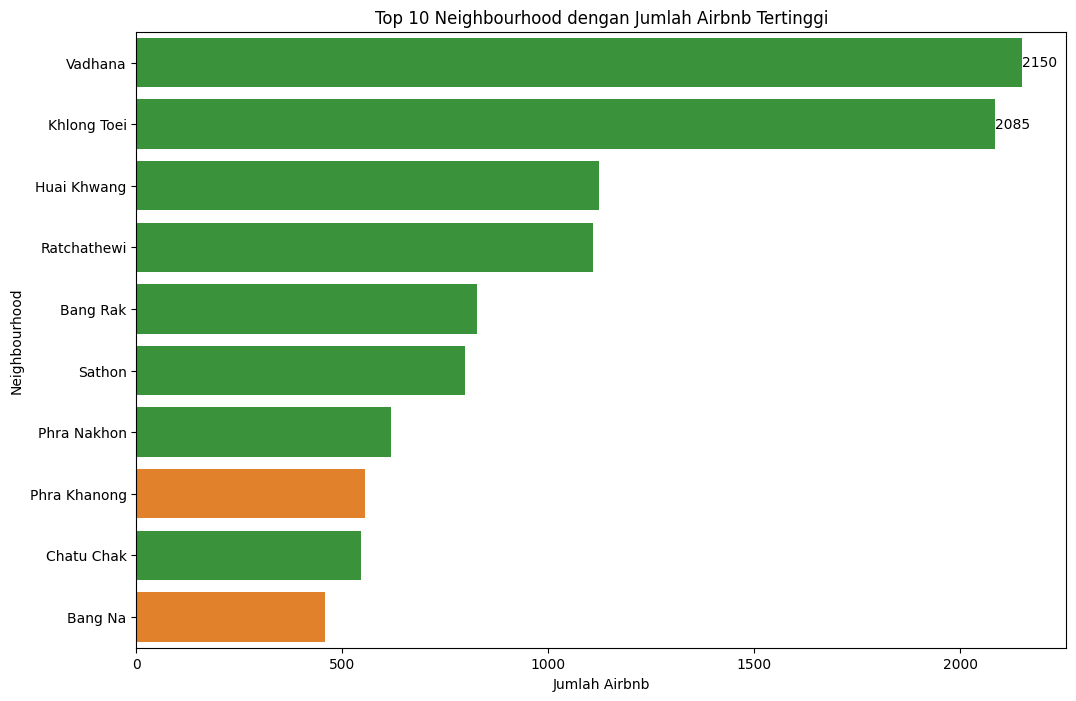

In [248]:
import seaborn as sns
import matplotlib.pyplot as plt

# Hitung jumlah Airbnb berdasarkan neighbourhood
airbnb_count_neighbourhood = df['neighbourhood'].value_counts().reset_index()
airbnb_count_neighbourhood.columns = ['neighbourhood', 'Count']

# Urutkan berdasarkan jumlah Airbnb
airbnb_count_neighbourhood = airbnb_count_neighbourhood.sort_values(by='Count', ascending=False)

# Ambil hanya 10 neighbourhood teratas
top_10_neighbourhood = airbnb_count_neighbourhood.head(10)

# Define custom color palette
custom_palette = {
    'Suburban': '#1f77b4',  # Blue
    'Urban Fringe': '#ff7f0e',  # Orange
    'Inner': '#2ca02c'  # Green
}

# Create a mapping of neighborhoods to their respective areas
neighbourhood_area_mapping = df[['neighbourhood', 'area']].drop_duplicates()
top_10_neighbourhood = top_10_neighbourhood.merge(neighbourhood_area_mapping, on='neighbourhood', how='left')

# Map colors based on area
top_10_neighbourhood['Color'] = top_10_neighbourhood['area'].map(custom_palette)

# Buat bar chart menggunakan Seaborn dengan warna yang sesuai
plt.figure(figsize=(12, 8))
# Convert 'Color' column to a list to be used as the palette
sns.barplot(data=top_10_neighbourhood, x='Count', y='neighbourhood', palette=top_10_neighbourhood['Color'].tolist())

# Annotate dua nilai tertinggi
for i in range(2):
    plt.text(top_10_neighbourhood['Count'].iloc[i] + 0.1, i,
             top_10_neighbourhood['Count'].iloc[i], va='center')

plt.title('Top 10 Neighbourhood dengan Jumlah Airbnb Tertinggi')
plt.xlabel('Jumlah Airbnb')
plt.ylabel('Neighbourhood')
plt.show()


- Dominasi Vadhana dan Khlong Toei: Kedua lingkungan ini memiliki jumlah Airbnb yang jauh lebih tinggi dibandingkan dengan yang lain, menunjukkan popularitas atau permintaan yang tinggi.
- Lingkungan Lain: Lingkungan seperti "Huai Khwang" dan "Ratchathewi" juga memiliki jumlah yang signifikan, tetapi jauh di bawah dua lingkungan teratas.
- Lingkungan dengan Jumlah Rendah: "Bang Na," "Chatu Chak," dan "Phra Khanong" menunjukkan jumlah yang lebih rendah, mungkin mencerminkan kurangnya permintaan atau fasilitas yang lebih sedikit.

Lingkungan dengan jumlah Airbnb yang tinggi, seperti Vadhana dan Khlong Toei, mungkin lebih dekat ke atraksi wisata dan memiliki akses transportasi yang lebih baik, sementara lingkungan dengan jumlah rendah, seperti Bang Na dan Chatu Chak, mungkin sedang dalam tahap pengembangan atau kurang dikenal di kalangan wisatawan.

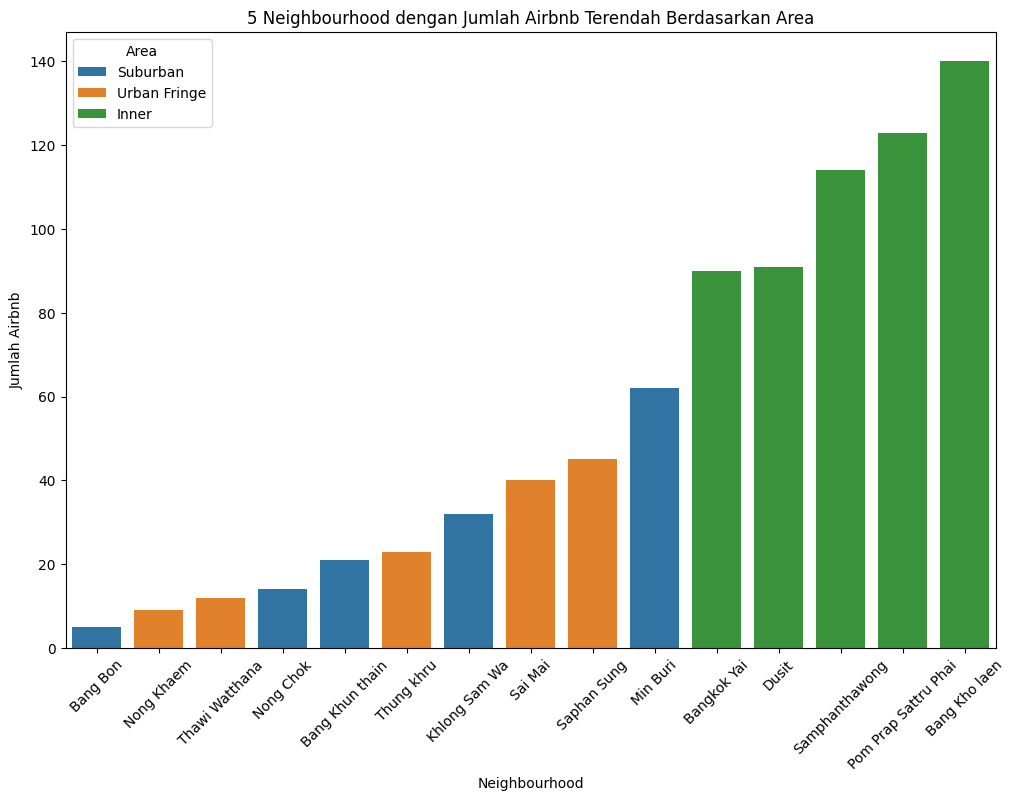

In [249]:
# Group by neighbourhood dan hitung jumlah listing
neighbourhood_listing_count = df.groupby(['neighbourhood', 'area']).size().reset_index(name='listing_count')

# Sorting nilai berdasarkan jumlah listing dari terendah ke tertinggi untuk setiap area
neighbourhood_listing_count_sorted = neighbourhood_listing_count.sort_values(by='listing_count', ascending=True)

# Ambil 5 neighbourhood dengan jumlah listing paling sedikit untuk setiap area
top_5_neighbourhoods_by_area = neighbourhood_listing_count_sorted.groupby('area').head(5)

# Buat grafik bar vertikal untuk masing-masing area
plt.figure(figsize=(12, 8))
sns.barplot(x='neighbourhood', y='listing_count', hue='area', data=top_5_neighbourhoods_by_area)
plt.title('5 Neighbourhood dengan Jumlah Airbnb Terendah Berdasarkan Area')
plt.xlabel('Neighbourhood')
plt.ylabel('Jumlah Airbnb')
plt.xticks(rotation=45)
plt.legend(title='Area')
plt.show()

- Pengembangan lebih lanjut di area "Urban Fringe" dan "Suburban" dapat meningkatkan jumlah Airbnb, menarik lebih banyak wisatawan.
- Area Inner Bangkok yang merupakan pusat bisnis dan banyaknya tempat wisata, seharusnya lebih dimaksimalkan lagi.

# ANALISA TIPE KAMAR

In [250]:
# jumlah masing-masng tipe kamar
room_type_counts = df['room_type'].value_counts()
room_type_counts

room_type
Entire home/apt    8880
Private room       5762
Hotel room          646
Shared room         522
Name: count, dtype: int64

In [251]:
# Group data by 'area' and 'room_type', then count the occurrences
room_type_by_area = df.groupby(['area', 'room_type'])['id'].count().reset_index()

# Print the result
room_type_by_area

area        room_type    id
0          Inner  Entire home/apt  7272
1          Inner       Hotel room   584
2          Inner     Private room  4179
3          Inner      Shared room   454
4       Suburban  Entire home/apt   102
5       Suburban       Hotel room    14
6       Suburban     Private room   148
7       Suburban      Shared room    19
8   Urban Fringe  Entire home/apt  1506
9   Urban Fringe       Hotel room    48
10  Urban Fringe     Private room  1435
11  Urban Fringe      Shared room    49

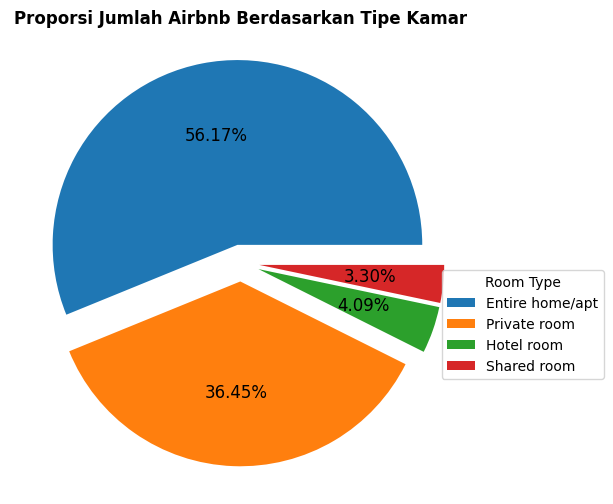

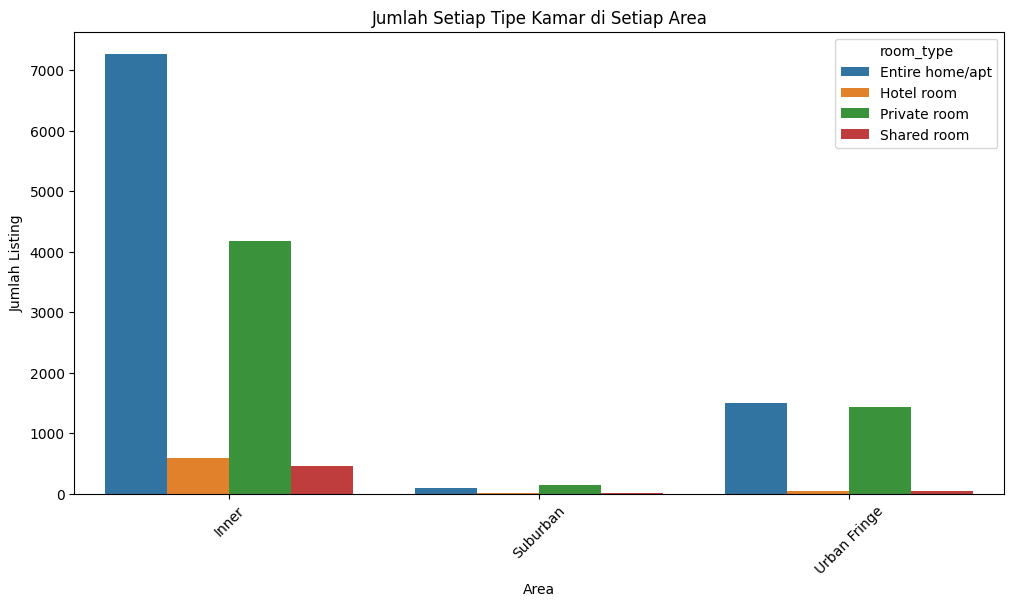

In [252]:
# Pie chart jumlah Airbnb per room_type
plt.figure(figsize=(10, 6))
# Get the number of categories in room_type_counts
num_categories = len(room_type_counts)

# Create an explode array with the correct length
explode = [0.1] * num_categories # Creates a list with num_categories elements, all set to 0.1

plt.pie(x=room_type_counts, autopct='%.2f%%',
        textprops={'color': 'black', 'fontname': 'DejaVu Sans', 'fontsize': 12},
        explode=explode) # Use the dynamically created explode array
plt.legend(room_type_counts.index, title='Room Type', loc='upper right', bbox_to_anchor=(1.3, 0.5)) #adjust bbox_to_anchor for legend positioning
plt.title('Proporsi Jumlah Airbnb Berdasarkan Tipe Kamar', fontweight='bold')
plt.show()

# Bar chart for room type counts per area
plt.figure(figsize=(12, 6))
sns.barplot(x='area', y='id', hue='room_type', data=room_type_by_area)
plt.title('Jumlah Setiap Tipe Kamar di Setiap Area')
plt.xlabel('Area')
plt.ylabel('Jumlah Listing')
plt.xticks(rotation=45)
plt.show()

Insight : Secara keseluruhan, diagram ini menunjukkan bahwa mayoritas pengguna Airbnb lebih memilih untuk menyewa seluruh rumah atau apartemen, diikuti oleh kamar pribadi. Tipe akomodasi yang lebih tradisional seperti kamar hotel dan kamar bersama memiliki proporsi yang jauh lebih kecil, mencerminkan tren preferensi pengguna yang lebih condong ke pengalaman tinggal yang lebih pribadi dan luas.

- Tipe akomodasi Entire home/apartment sangat mendominasi di area Inner dan Urban Fringe.
- Di area Urban Fringe, proporsi antara Entire home/apartment dan Private room hampir seimbang.
- Sementara itu, di area Suburban, tipe Private room lebih banyak dibandingkan dengan tipe lainnya.
- Di semua area, jumlah Shared room merupakan yang paling sedikit jika dibandingkan dengan tipe kamar lainnya.



In [253]:
area = df.groupby(['neighbourhood', 'area'])[['name', 'room_type']].count().sort_values(by='name').reset_index()

# 5 district tertinggi berdasarkan zona
top_5_by_city = area.groupby('area').apply(lambda group: group.nsmallest(5, 'name')).reset_index(drop=True)

# Menampilkan room type nya
top5_city = df.groupby(['neighbourhood', 'area', 'room_type'])[['name']].count().reset_index()
top5_city = pd.merge(top_5_by_city, top5_city, on=['neighbourhood', 'area'])

# Ganti nama kolom
top5_city = top5_city.rename(columns={'name_y': 'count', 'room_type_y': 'room_type'})

# Hapus kolom name_x dan room_type_x
top5_city = top5_city.drop(['name_x', 'room_type_x'], axis=1)


# Tampilkan hasil
display(top5_city)

neighbourhood          area        room_type  count
0            Bangkok Yai         Inner  Entire home/apt     41
1            Bangkok Yai         Inner       Hotel room      3
2            Bangkok Yai         Inner     Private room     43
3            Bangkok Yai         Inner      Shared room      3
4                  Dusit         Inner  Entire home/apt     12
5                  Dusit         Inner     Private room     71
6                  Dusit         Inner      Shared room      8
7         Samphanthawong         Inner  Entire home/apt     45
8         Samphanthawong         Inner       Hotel room      9
9         Samphanthawong         Inner     Private room     47
10        Samphanthawong         Inner      Shared room     13
11  Pom Prap Sattru Phai         Inner  Entire home/apt     49
12  Pom Prap Sattru Phai         Inner       Hotel room     11
13  Pom Prap Sattru Phai         Inner     Private room     58
14  Pom Prap Sattru Phai         Inner      Shared room      5
15         Bang Kho laen         Inner  Entire home/apt     93
16         Bang Kho laen         Inner       Hotel room      2
17         Bang Kho laen         Inner     Private room     45
18              Bang Bon      Suburban  Entire home/apt      2
19              Bang Bon      Suburban     Private room      3
20             Nong Chok      Suburban  Entire home/apt      8
21             Nong Chok      Suburban     Private room      6
22       Bang Khun thain      Suburban  Entire home/apt      7
23       Bang Khun thain      Suburban     Private room     12
24       Bang Khun thain      Suburban      Shared room      2
25         Khlong Sam Wa      Suburban  Entire home/apt     20
26         Khlong Sam Wa      Suburban     Private room     12
27              Min Buri      Suburban  Entire home/apt     26
28              Min Buri      Suburban     Private room     35
29              Min Buri      Suburban      Shared room      1
30            Nong Khaem  Urban Fringe  Entire home/apt      2
31            Nong Khaem  Urban Fringe     Private room      7
32        Thawi Watthana  Urban Fringe  Entire home/apt      5
33        Thawi Watthana  Urban Fringe     Private room      7
34            Thung khru  Urban Fringe  Entire home/apt      9
35            Thung khru  Urban Fringe     Private room     14
36               Sai Mai  Urban Fringe  Entire home/apt     18
37               Sai Mai  Urban Fringe     Private room     22
38           Saphan Sung  Urban Fringe  Entire home/apt     20
39           Saphan Sung  Urban Fringe     Private room     24
40           Saphan Sung  Urban Fringe      Shared room      1

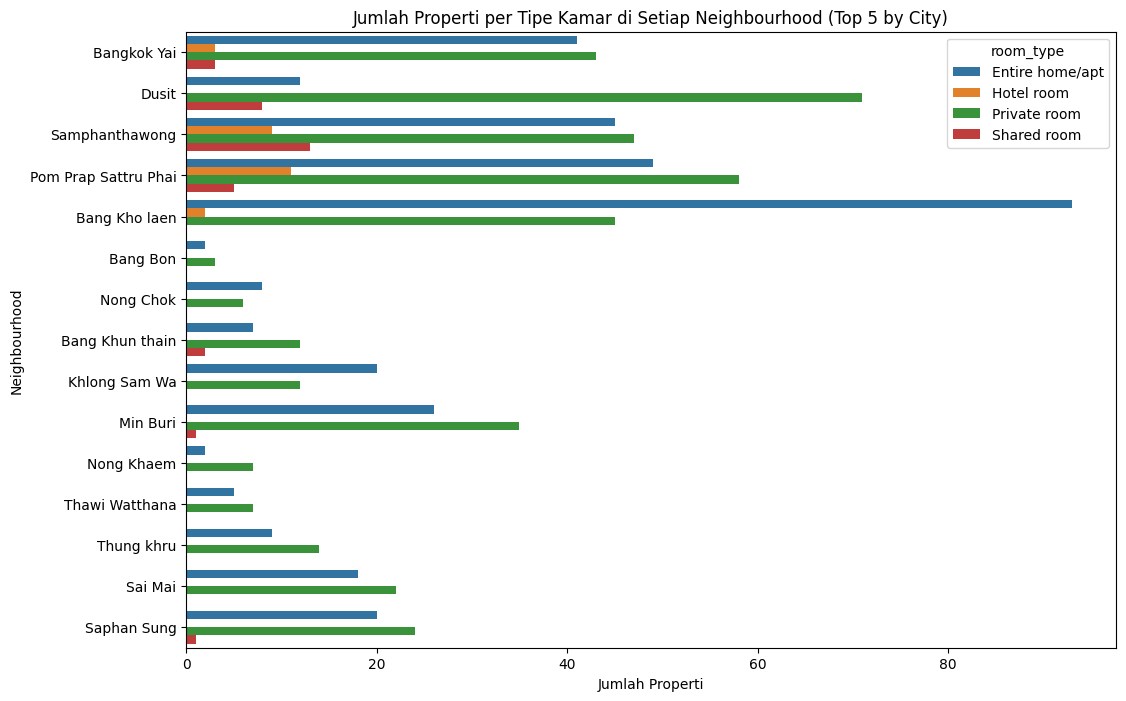

In [254]:
# visualisasi
plt.figure(figsize=(12, 8))
sns.barplot(x='count', y='neighbourhood', hue='room_type', data=top5_city)
plt.title('Jumlah Properti per Tipe Kamar di Setiap Neighbourhood (Top 5 by City)')
plt.xlabel('Jumlah Properti')
plt.ylabel('Neighbourhood')
plt.show()

Insight :
1. Tipe Kamar Paling Populer: Sebagian besar properti yang tersedia adalah seluruh rumah atau apartemen. Ini menunjukkan bahwa banyak pemilik lebih suka menyewakan unit secara keseluruhan daripada hanya kamar.
2. Variasi di Beberapa Lingkungan: Di lingkungan seperti Samphanthawong, ada lebih banyak variasi tipe kamar, termasuk hotel room dan private room. Ini bisa berarti area tersebut menawarkan lebih banyak pilihan akomodasi.
3. Kamar Bersama Jarang: Jumlah kamar bersama sangat sedikit dibandingkan tipe kamar lainnya. Ini mungkin menunjukkan bahwa orang lebih memilih privasi saat menginap.
4. Konsentrasi Properti: Lingkungan seperti Bangkok Yai dan Samphanthawong memiliki banyak properti, yang bisa berarti area ini lebih populer di kalangan wisatawan.
5. Peluang di Lingkungan Lain: Beberapa lingkungan, seperti Bang Bon dan Nong Khem, memiliki jumlah properti yang lebih sedikit. Ini bisa menjadi peluang bagi pemilik untuk meningkatkan penawaran mereka di area tersebut.
6. Tren Wisata: Data ini juga memberikan gambaran tentang tren wisata di Bangkok. Lingkungan dengan lebih banyak properti mungkin lebih dekat dengan tempat wisata atau transportasi umum yang menarik bagi pengunjung.

# ANALISI PRODUCT

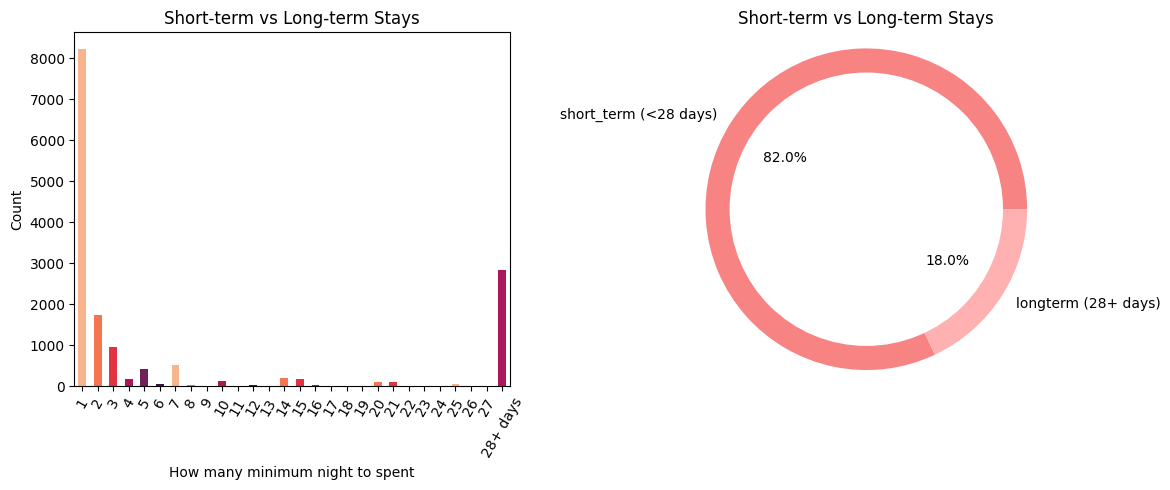

In [255]:
#membuat dataframe baru khusus untuk short-term dan long-term
df_stay = df

#Bar 1 = membuat kartegori setiap hari sampai hari ke 28+
plt.figure(figsize=(12, 5))
def categorize_nights(value):
    if value >= 28:
        return '28+ days'
    else:
        return f'{value}'
df_stay['night_category'] = df_stay['minimum_nights'].apply(categorize_nights)
custom_order = [
    f'{i}' for i in range(1, 28)
] + ['28+ days']
grouped_stay = df_stay['night_category'].value_counts().reindex(custom_order, fill_value=0)

palet = sns.color_palette("rocket_r")
# Plot untuk Bar1
plt.subplot(1, 2, 1)
grouped_stay.plot(kind='bar', title='Short-term vs Long-term Stays',color=palet)
plt.xlabel('How many minimum night to spent')
plt.ylabel('Count')
plt.xticks(rotation=60, ha='center')

# Bar 2: Bar untuk short-term dan long-term
plt.subplot(1, 2, 2)

grouped_stay2 = df_stay.groupby(df_stay['minimum_nights'] > 27)['name'].count()
grouped_stay2.index = ['short_term', 'long_term']

plt.pie(grouped_stay2, labels=['short_term (<28 days)', 'longterm (28+ days)'], autopct='%1.1f%%',  colors=['#f78383', '#ffb0b0'])
plt.title('Short-term vs Long-term Stays')
plt.axis('equal')
fig=plt.gcf()
centre_circle = plt.Circle((0,0),0.85,fc='white')
fig.gca().add_artist(centre_circle)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [256]:
df_stay.rename(columns={'night_category': 'term'}, inplace=True)
def convert_to_term_category(value):
    if value == '28+ days':
        return 'long'
    else:
        try:
            value_int = int(value)
            return 'short' if value_int <= 27 else 'long'
        except ValueError: #karena ada nilai 28+ di kolom ada '+'nya jadi yang error kita masukkan ke 'else'
            return value
df_stay['term'] = df_stay['term'].apply(convert_to_term_category)

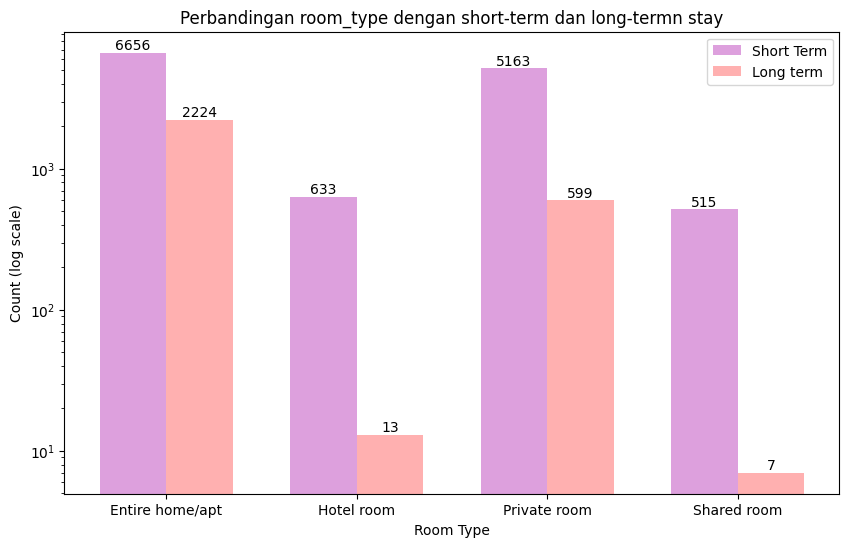

In [257]:
grouped_data = df_stay.groupby(['room_type', 'term']).size().unstack()
df_stay.groupby(['room_type', 'term']).size().unstack()

bar_width = 0.35
index = np.arange(len(grouped_data))

fig, ax = plt.subplots(figsize=(10, 6))

# memakai log untuk membandingkan angkanya
ax.set_yscale('log')

bar1 = ax.bar(index, grouped_data['short'], bar_width, label='Short Term',color='plum')
bar2 = ax.bar(index + bar_width, grouped_data['long'], bar_width, label='Long term',color='#ffb0b0')

ax.set_title("Perbandingan room_type dengan short-term dan long-termn stay")
ax.set_xlabel("Room Type")
ax.set_ylabel("Count (log scale)")
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(grouped_data.index)
ax.legend()

for bar in bar1:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

for bar in bar2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.show()

insight:
- Tipe Kamar "Entire home/apt" memiliki jumlah short-term stays yang sangat tinggi (6677) dibandingkan dengan long-term stays (2224). Ini menunjukkan bahwa tipe kamar ini sangat populer untuk penyewa jangka pendek.
- Tipe Kamar "Hotel room" menunjukkan jumlah yang sangat rendah untuk short-term stays (13) dan long-term stays (635). Ini mungkin mencerminkan bahwa hotel lebih sering digunakan untuk akomodasi jangka pendek, tetapi data ini menunjukkan bahwa hotel di area ini tidak banyak diminati.
- Tipe Kamar "Private room" memiliki jumlah short-term stays (5169) yang jauh lebih tinggi dibandingkan long-term stays (599). Ini menunjukkan bahwa banyak orang memilih untuk menyewa kamar pribadi untuk waktu yang lebih singkat.
- Tipe Kamar "Shared room" menunjukkan jumlah yang paling rendah di antara semua tipe, dengan 7 untuk long-term stays dan 515 untuk short-term stays. Ini mungkin mencerminkan bahwa tipe ini lebih cocok untuk penyewa dengan anggaran terbatas atau untuk mereka yang mencari pengalaman berbagi.

Selanjutnya, perhatian akan tertuju pada host itu sendiri, yang berfungsi sebagai penghubung antara Airbnb dan pelanggan. Di sini, akan dibahas perbandingan antara host dan jumlah ulasan yang mereka terima.

In [258]:
grouped_product = df.groupby('host_name').agg({'host_name': 'count', 'number_of_reviews': 'sum'})
grouped_product.rename(columns={'host_name': 'count_of_hostname', 'number_of_reviews': 'total_number_of_reviews'}, inplace=True)
grouped_product.reset_index(inplace=True)
top_10_hosts = grouped_product.sort_values(by='count_of_hostname', ascending=False).head(10)
top_10_reviews = grouped_product.sort_values(by='total_number_of_reviews', ascending=False).head(10)

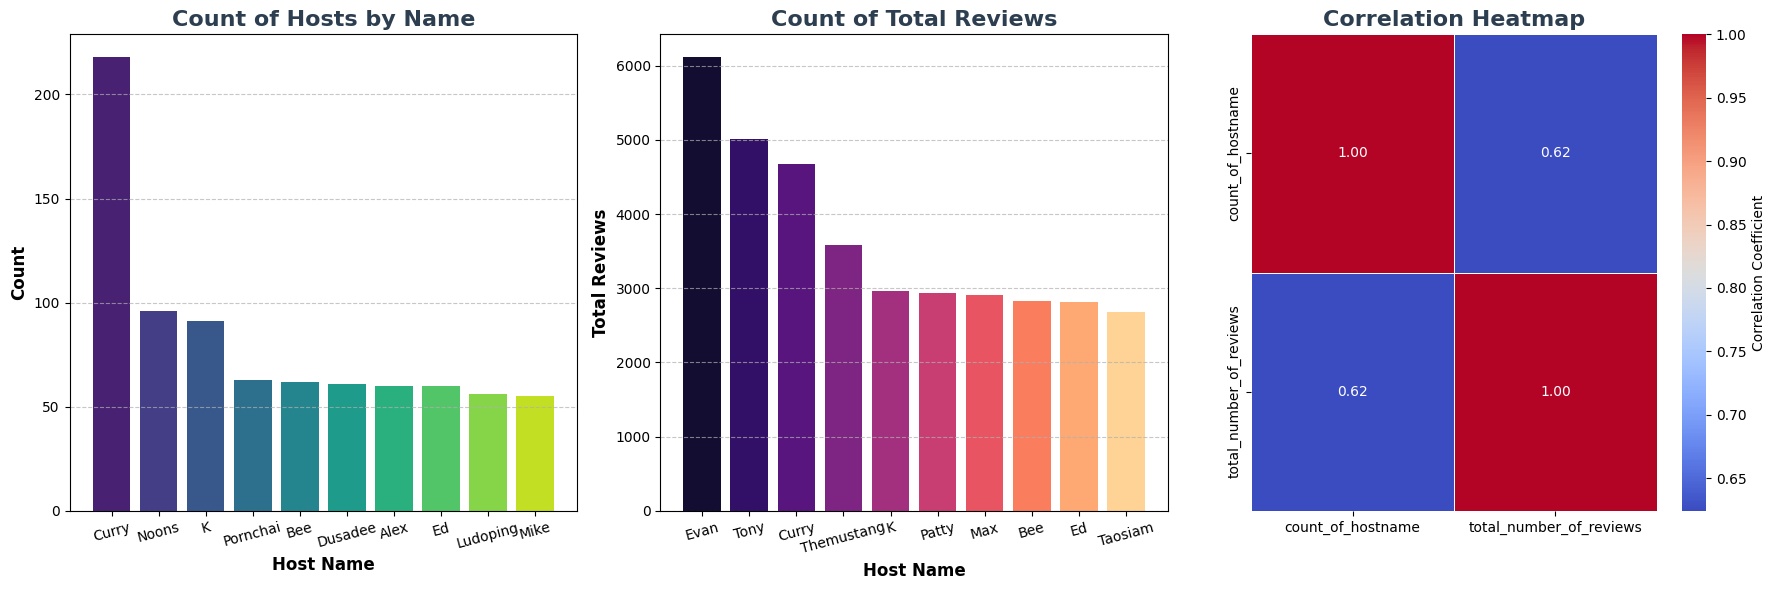

In [259]:
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat figure dan axes
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

grouped_product = df.groupby('host_name').agg({'host_name': 'count', 'number_of_reviews': 'sum'})
grouped_product.rename(columns={'host_name': 'count_of_hostname', 'number_of_reviews': 'total_number_of_reviews'}, inplace=True)
grouped_product.reset_index(inplace=True)
top_10_hosts = grouped_product.sort_values(by='count_of_hostname', ascending=False).head(10)
top_10_reviews = grouped_product.sort_values(by='total_number_of_reviews', ascending=False).head(10)
# Graph 1 - Count of host by name

axes[0].bar(top_10_hosts['host_name'], top_10_hosts['count_of_hostname'],
            color=sns.color_palette("viridis", n_colors=len(top_10_hosts)))
axes[0].set_title('Count of Hosts by Name', fontsize=16, fontweight='bold', color='#2c3e50')
axes[0].set_xlabel('Host Name', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Count', fontsize=12, fontweight='bold')
axes[0].tick_params(axis='x', rotation=15)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Graph 2 - Count of Total Review
palet2 = sns.color_palette("magma", n_colors=len(top_10_reviews))
axes[1].bar(top_10_reviews['host_name'], top_10_reviews['total_number_of_reviews'], color=palet2)
axes[1].set_title('Count of Total Reviews', fontsize=16, fontweight='bold', color='#2c3e50')
axes[1].set_xlabel('Host Name', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Total Reviews', fontsize=12, fontweight='bold')
axes[1].tick_params(axis='x', rotation=15)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Graph 3 - Correlation Heatmap
correlation_product = grouped_product[['count_of_hostname', 'total_number_of_reviews']].corr()
sns.heatmap(correlation_product, annot=True, fmt=".2f", ax=axes[2], cmap='coolwarm',
            cbar_kws={'label': 'Correlation Coefficient'}, linewidths=0.5)

# Menambahkan judul untuk heatmap
axes[2].set_title('Correlation Heatmap', fontsize=16, fontweight='bold', color='#2c3e50')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


Interpretasi :
- Host "Curry" memiliki jumlah tertinggi dengan lebih dari 200, menunjukkan bahwa dia adalah salah satu host paling aktif atau populer di platform.
- Terdapat korelasi positif yang kuat (0.62) antara jumlah host dan total jumlah ulasan. Ini menunjukkan bahwa host yang memiliki lebih banyak akomodasi cenderung mendapatkan lebih banyak ulasan, yang mungkin mencerminkan tingkat kepuasan tamu yang tinggi.


Insight :    
- Beberapa Hal yang bisa kita ambil,
Tipe airbnb yang paling populer adalah entire home/apt disusul oleh private room
K adalah host yang memiliki listing terbanyak dan masuk top 10 jumlah review terbanyak.
Evan memiliki jumlah review terbanyak namun tidak masuk total listing terbanyak.
Implikasi dan rekomendasi:


Namun untuk shared room tersendiri yang berjumlah paling rendah, airbnb mungkin bisa menginfluensi para shared room host untuk memberikan amenities/fasilitas yang lebih.
Airbnb bisa memberikan reward kepada host curry dan Evan dikarenakan mereka berdua memiliki influensi kuat dalam airbnb ini. Dan juga airbnb bisa melakukan kompetisi atau loyalty program untuk memotivasi host-host lainnya.

Rekomendasi:
- Pelajari host dengan jumlah ulasan tertinggi, seperti Evan dan Tony, untuk memahami praktik terbaik mereka. Ini bisa mencakup cara mereka berinteraksi dengan tamu, kualitas akomodasi, dan strategi pemasaran.
- Disini airbnb bisa terus melakukan optimasi terhadap pencarian host baru lebih tertarik untuk melnginvestasi keseluruhan bangunannya, karena yang populer adalah entire home/apt.
- Tawarkan program pelatihan bagi host baru atau yang kurang berpengalaman untuk meningkatkan keterampilan mereka dalam memberikan layanan pelanggan dan mengelola akomodasi.

# ANALISIS AVAILIBILITY

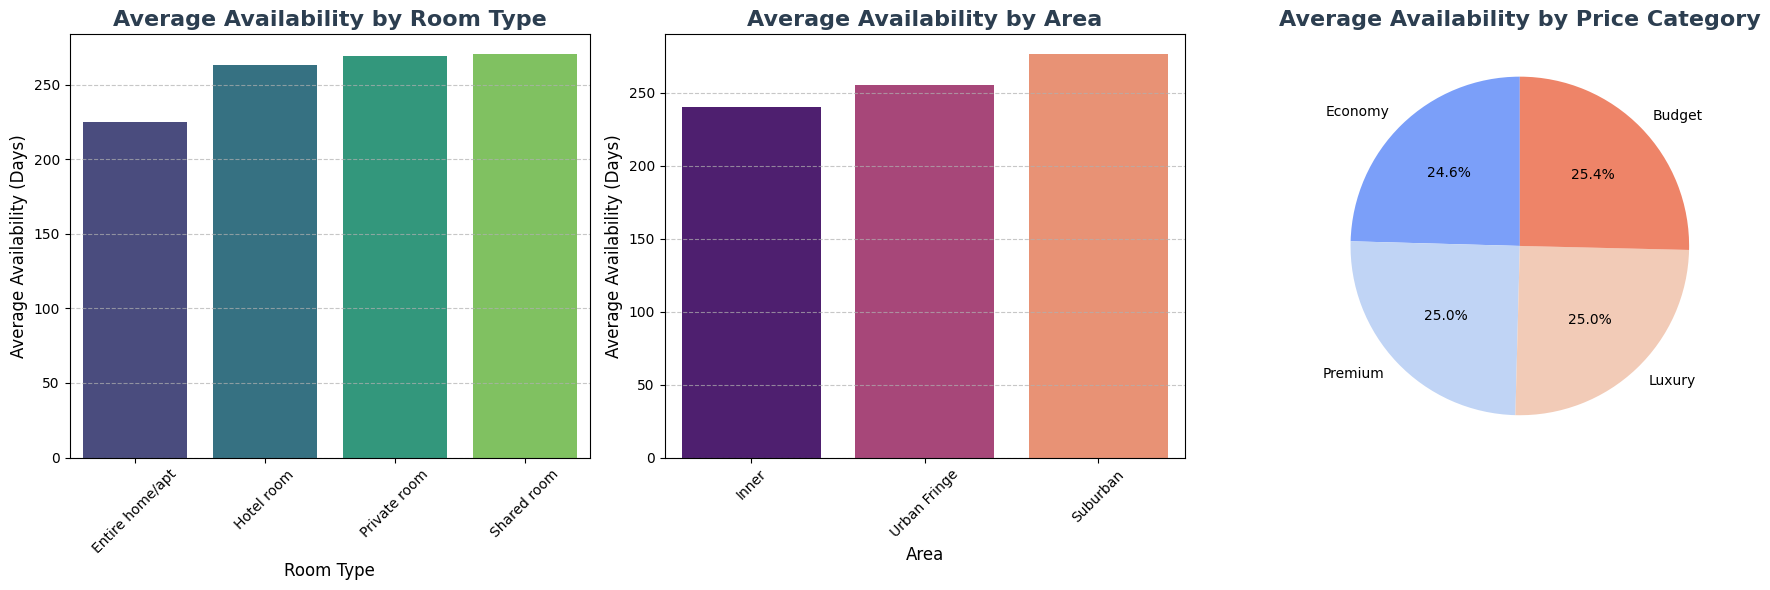

In [260]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Group by room type and calculate average availability
room_type_availability = df.groupby('room_type')['availability_365'].mean().sort_values()

# Group by area and calculate average availability
area_availability = df.groupby('area')['availability_365'].mean().sort_values()

# Group by price category and calculate average availability
df['price_category'] = pd.qcut(df['price'], q=4, labels=['Budget', 'Economy', 'Premium', 'Luxury'])
price_category_availability = df.groupby('price_category')['availability_365'].mean().sort_values()

# Create a figure with three subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Bar plot for room type
sns.barplot(x=room_type_availability.index, y=room_type_availability.values, ax=axes[0], palette='viridis')
axes[0].set_title('Average Availability by Room Type', fontsize=16, fontweight='bold', color='#2c3e50')
axes[0].set_xlabel('Room Type', fontsize=12)
axes[0].set_ylabel('Average Availability (Days)', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Bar plot for area
sns.barplot(x=area_availability.index, y=area_availability.values, ax=axes[1], palette='magma')
axes[1].set_title('Average Availability by Area', fontsize=16, fontweight='bold', color='#2c3e50')
axes[1].set_xlabel('Area', fontsize=12)
axes[1].set_ylabel('Average Availability (Days)', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Pie chart for price category
axes[2].pie(price_category_availability, labels=price_category_availability.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('coolwarm', n_colors=len(price_category_availability)))
axes[2].set_title('Average Availability by Price Category', fontsize=16, fontweight='bold', color='#2c3e50')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()



Interpretasi
- Tipe Kamar "Entire home/apt" dan "Hotel room" menunjukkan rata-rata ketersediaan yang tinggi, lebih dari 200 hari. Ini menunjukkan bahwa jenis akomodasi ini cenderung lebih sering tersedia untuk disewa.
- Tipe Kamar "Private room" dan "Shared room" juga memiliki ketersediaan yang baik, tetapi mungkin sedikit lebih rendah dibandingkan dengan "Entire home/apt" dan "Hotel room". Ini bisa menunjukkan bahwa pemilik kamar pribadi dan berbagi mungkin lebih sering menggunakan akomodasi mereka.
- Kategori harga "Budget" dan "Economy" menunjukkan rata-rata ketersediaan yang tinggi, sedangkan "Premium" dan "Luxury" juga memiliki ketersediaan yang baik tetapi mungkin sedikit lebih rendah. Ini menunjukkan bahwa akomodasi dengan harga lebih terjangkau lebih sering tersedia.
- Ketersediaan yang baik di semua kategori harga menunjukkan bahwa ada banyak pilihan untuk penyewa, terlepas dari anggaran mereka.



Insight:
- Ketersediaan yang tinggi di area "Inner" dapat menunjukkan bahwa area tersebut adalah lokasi yang populer untuk penyewa, sehingga pemilik akomodasi di area ini mungkin mendapatkan lebih banyak permintaan.
- Penyewa mungkin lebih cenderung memilih "Entire home/apt" dan akomodasi dengan kategori harga "Budget" atau "Economy" karena ketersediaan yang tinggi, yang mencerminkan permintaan yang kuat untuk jenis akomodasi ini.


Rekomendasi :
- Pemilik akomodasi mungkin perlu mempertimbangkan untuk mempromosikan "Private room" dan "Shared room" lebih agresif, terutama jika mereka ingin meningkatkan tingkat hunian.
- Pertimbangkan untuk menawarkan berbagai tipe akomodasi, termasuk "Private room" dan "Shared room", untuk menarik lebih banyak penyewa. Ini dapat membantu meningkatkan tingkat hunian, terutama di area dengan permintaan tinggi.

selanjutnya saya mencari top 5 avaibility terendah

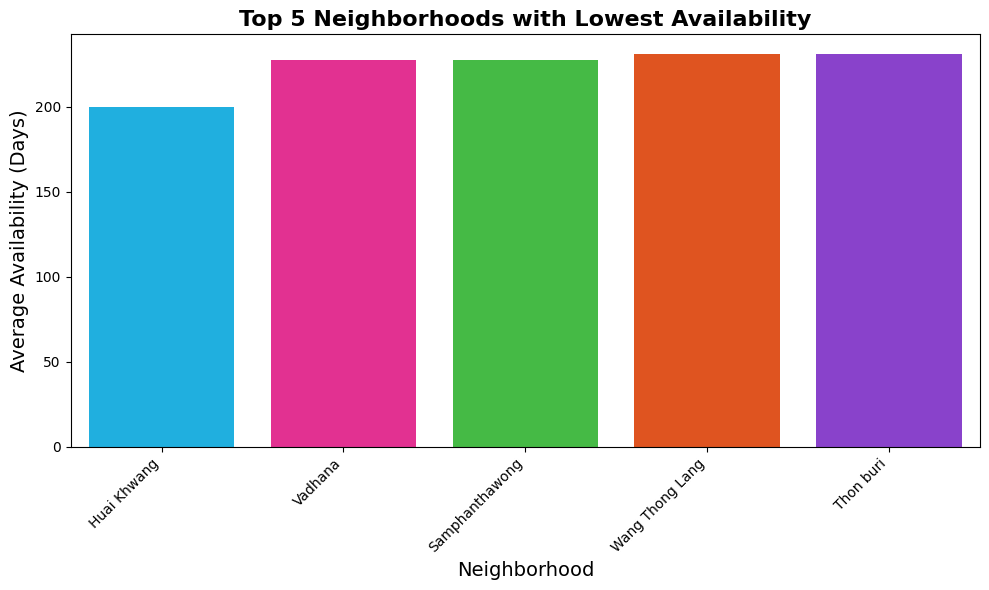

In [261]:
# Group by neighborhood and calculate the mean availability
neighborhood_availability = df.groupby('neighbourhood')['availability_365'].mean()

# Sort neighborhoods by availability in ascending order (lowest availability first)
top_5_lowest_availability = neighborhood_availability.sort_values().head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_lowest_availability.index,
            y=top_5_lowest_availability.values,
            palette=['#00bfff', '#ff1493', '#32cd32', '#ff4500', '#8a2be2'])  # Warna futuristik

plt.title('Top 5 Neighborhoods with Lowest Availability', fontsize=16, fontweight='bold')
plt.xlabel('Neighborhood', fontsize=14)
plt.ylabel('Average Availability (Days)', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()  # Menampilkan grafik


In [262]:
# Assuming 'df' is your DataFrame
neighborhoods = ['Huai Khwang', 'Vadhana', 'Samphanthawong', 'Wang Thong Lang', 'Thon buri']
for neighborhood in neighborhoods:
  count = len(df[df['neighbourhood'] == neighborhood])
  print(f"Jumlah listing di {neighborhood}: {count}")


Jumlah listing di Huai Khwang: 1122
Jumlah listing di Vadhana: 2150
Jumlah listing di Samphanthawong: 114
Jumlah listing di Wang Thong Lang: 100
Jumlah listing di Thon buri: 182


dari avaibility dan jumlah listings tersebut vadhana memiliki potensi yang paling unggul diantara yang lain.
mari kita lihat karakteristik kamar dan harganya

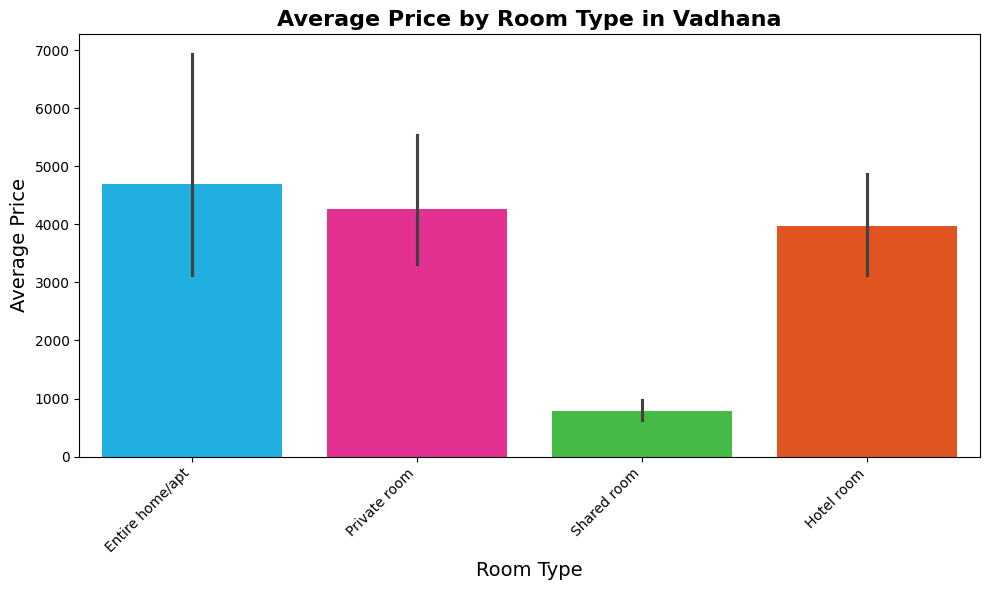

In [263]:
# prompt: # Bar plot for average price by room type vadhana

# Assuming 'df' is your DataFrame and 'Vadhana' is correctly spelled in your data.
vadhana_df = df[df['neighbourhood'] == 'Vadhana']

# Membuat grafik batang dengan warna futuristik
plt.figure(figsize=(10, 6))
sns.barplot(x='room_type',
            y='price',
            data=vadhana_df,
            palette=['#00bfff', '#ff1493', '#32cd32', '#ff4500'])  # Warna futuristik

plt.title('Average Price by Room Type in Vadhana', fontsize=16, fontweight='bold')
plt.xlabel('Room Type', fontsize=14)
plt.ylabel('Average Price', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()  # Menampilkan grafik


                 count  availability  proportion
room_type                                       
Entire home/apt   1451    205.161268    0.674884
Hotel room         104    281.576923    0.048372
Private room       542    268.512915    0.252093
Shared room         53    302.830189    0.024651


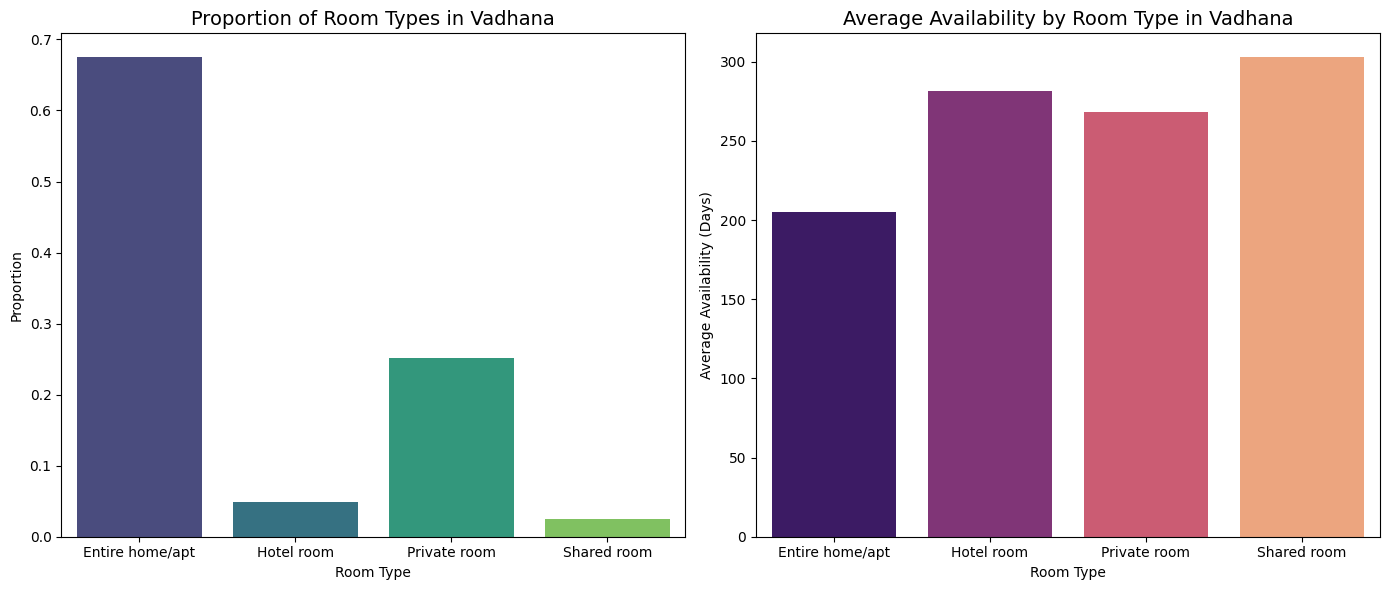

In [264]:

# Filter data for Vadhana neighborhood
vadhana_data = df[df['neighbourhood'] == 'Vadhana']

# Group by room type and calculate counts and availability
room_stats = vadhana_data.groupby('room_type').agg(
    count=('room_type', 'count'),
    availability=('availability_365', 'mean')
)

# Calculate proportions
room_stats['proportion'] = room_stats['count'] / room_stats['count'].sum()

# Print the results
print(room_stats)


# Visualization (optional):
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bar plot for room type proportions
sns.barplot(x=room_stats.index, y=room_stats['proportion'], ax=axes[0], palette="viridis")
axes[0].set_title('Proportion of Room Types in Vadhana', fontsize=14)
axes[0].set_xlabel('Room Type')
axes[0].set_ylabel('Proportion')


# Bar plot for average availability by room type
sns.barplot(x=room_stats.index, y=room_stats['availability'], ax=axes[1], palette="magma")
axes[1].set_title('Average Availability by Room Type in Vadhana', fontsize=14)
axes[1].set_xlabel('Room Type')
axes[1].set_ylabel('Average Availability (Days)')


plt.tight_layout()
plt.show()

saran saya untuk investor dan pengembang
- Dengan melihat entire home/ apt memiliki proporsi tertinggi hampir (70%) dan ketersediaan yang baik. Ini menunjukkan bahwa tamu lebih memilih privasi dan ruang.
saran tingkatkan jumlah akomodasi jenis ini untuk menarik lebih banyak tamu.
- pada Hotel room meskipun mahal, tetap diminati.
saran tawarkan paket menarik atau diskon untuk meningkatkan hunian
- Proporsi dan ketersediaan lebih rendah.
Saran: Lakukan promosi atau tawarkan fasilitas tambahan untuk menarik tamu dengan anggaran terbatas.



# ANALISIS PLACE/AREA

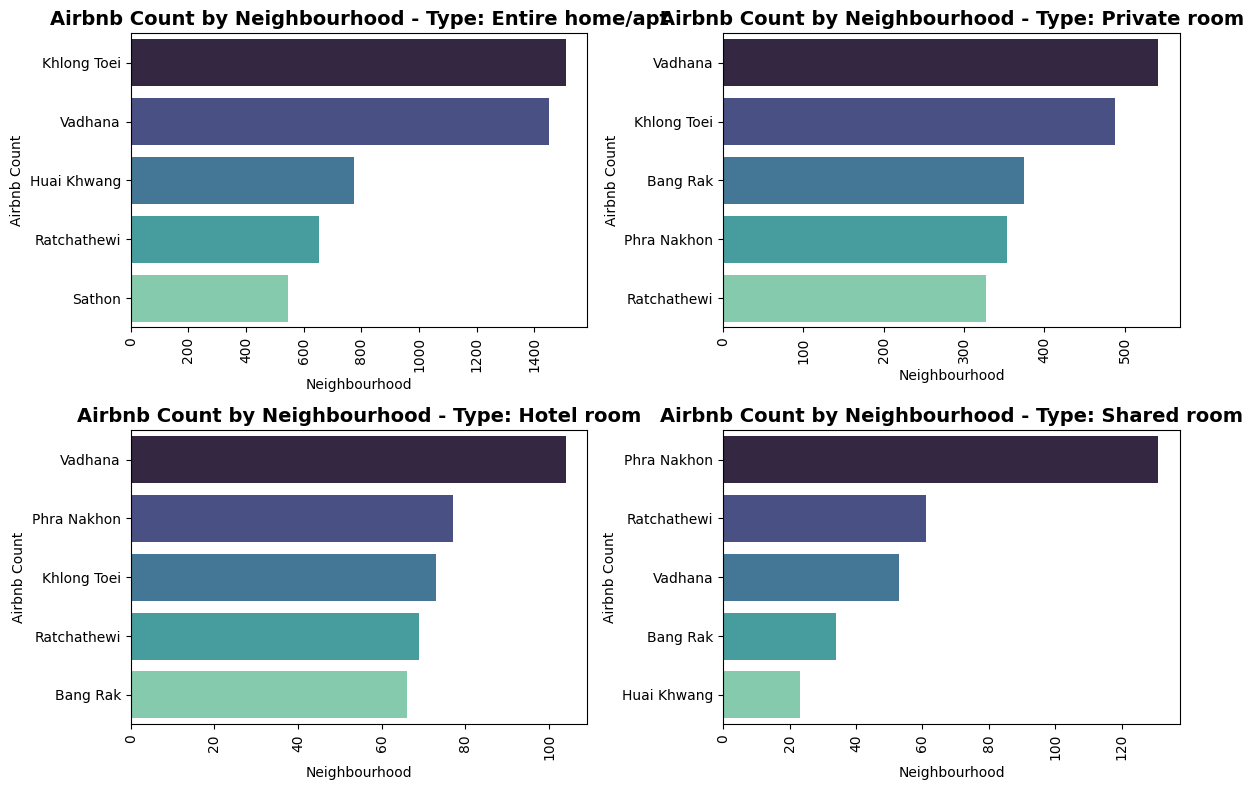

In [265]:
import matplotlib.pyplot as plt
import seaborn as sns
# Membuat figure
plt.figure(figsize=(12, 8))

# Loop untuk setiap tipe kamar
for i, room_type in enumerate(room_types, 1):
    plt.subplot(2, 2, i)
    subset_data = df[df['room_type'] == room_type]
    count_by_neighbourhood = subset_data.groupby('neighbourhood')['name'].count().sort_values(ascending=False).head(5)

    # Menggunakan palet warna futuristik
    sns.barplot(y=count_by_neighbourhood.index, x=count_by_neighbourhood.values, palette='mako')

    plt.xticks(rotation=90)
    plt.xlabel('Neighbourhood')
    plt.ylabel('Airbnb Count')
    plt.title(f'Airbnb Count by Neighbourhood - Type: {room_type}', fontsize=14, fontweight='bold')
    plt.tight_layout()

# Menampilkan plot
plt.show()


Insight:

1. Seluruh Rumah/Apartemen:
Lingkungan Teratas:
- Khlong Toei dan Vadhana mendominasi dengan jumlah iklan tertinggi.
Huai Khwang, Ratchathewi, dan Sathon menyusul dengan jumlah iklan yang jauh lebih sedikit.
Informasi: Lingkungan ini populer untuk persewaan seluruh rumah/apartemen, yang kemungkinan besar melayani keluarga atau kelompok.
2. Kamar Hotel:
Lingkungan Teratas:
- Vadhana memimpin, diikuti oleh Phra Nakhon dan Khlong Toei.
Ratchathewi dan Bang Rak juga memiliki kehadiran yang menonjol.
Informasi: Vadhana dan Phra Nakhon adalah tempat populer untuk akomodasi bergaya hotel, kemungkinan karena lokasinya yang sentral.
3. Kamar Pribadi:
Lingkungan Teratas:
- Vadhana memiliki jumlah iklan tertinggi, diikuti oleh Khlong Toei dan Bang Rak.
Phra Nakhon dan Ratchathewi juga memiliki jumlah iklan yang signifikan.
Informasi: Kamar pribadi populer di Vadhana dan Khlong Toei, mungkin karena keterjangkauan dan kedekatannya dengan area utama.
4. Kamar Bersama:
Lingkungan Teratas:
- Phra Nakhon memimpin dengan selisih yang besar, diikuti oleh Ratchathewi dan Vadhana.
Bang Rak dan Huai Khwang memiliki lebih sedikit daftar.
Informasi: Kamar bersama terkonsentrasi di Phra Nakhon, kemungkinan melayani pelancong dengan anggaran terbatas dan backpacker.

menghighlight Bang Rak Meskipun jumlahnya lebih rendah, ada potensi untuk menarik tamu dengan penawaran yang tepat.

In [266]:
print('Neighbourhood: Bang Rak')
df[df['neighbourhood'] == 'Bang Rak'].groupby('room_type')['room_type'].value_counts()

Neighbourhood: Bang Rak


room_type
Entire home/apt    351
Hotel room          66
Private room       375
Shared room         34
Name: count, dtype: int64

Bisa dilihat terdapat gap yang cukup besar dengan perbandingan 1/10, pun daerah Bang Rak adalah salah satu distrik di Bangkok yang punya daya tarik wisata yang tinggi semisal Wat Yan Nawa dan Sathorn Pier.

Rekomendasi : dengan hanya 67 unit hotel room, ada peluang besar untuk menambah jumlah ini. Mengingat lokasi Bang Rak yang strategis dekat dengan atraksi wisata seperti Wat Yan Nawa dan Sathorn Pier, menambah hotel room dapat menarik lebih banyak wisatawan.

Rekomendasi lain yang bisa diberikan di location optimization adalah mencari gap supply dan demand pada area di bangkok. mari kita bahas dibawah ini.

In [267]:
# Hitung Okupansi
supply_demand = df.groupby('neighbourhood').agg({
    'id': 'count',  # jumlah listing
    'availability_365': lambda x: (365 - x.mean()) / 365 * 100  # okupansi rate dalam %
}).round(2)

# Rename columns
supply_demand.columns = ['Jumlah_Listing', 'Tingkat_Okupansi']

# Sort by occupancy rate
supply_demand = supply_demand.sort_values('Tingkat_Okupansi', ascending=False)

print("Analisis Supply vs Demand per Area:")
print(supply_demand)

Analisis Supply vs Demand per Area:
                      Jumlah_Listing  Tingkat_Okupansi
neighbourhood                                         
Huai Khwang                     1122             45.19
Vadhana                         2150             37.74
Samphanthawong                   114             37.72
Wang Thong Lang                  100             36.79
Thon buri                        182             36.71
Khlong Toei                     2085             36.65
Bang Sue                         250             36.58
Phra Khanong                     555             35.49
Bang Phlat                       216             35.45
Khan Na Yao                       55             34.37
Phaya Thai                       421             33.18
Bang Na                          458             33.09
Bueng Kum                         54             32.56
Parthum Wan                      455             32.33
Bang Rak                         826             32.15
Thawi Watthana               

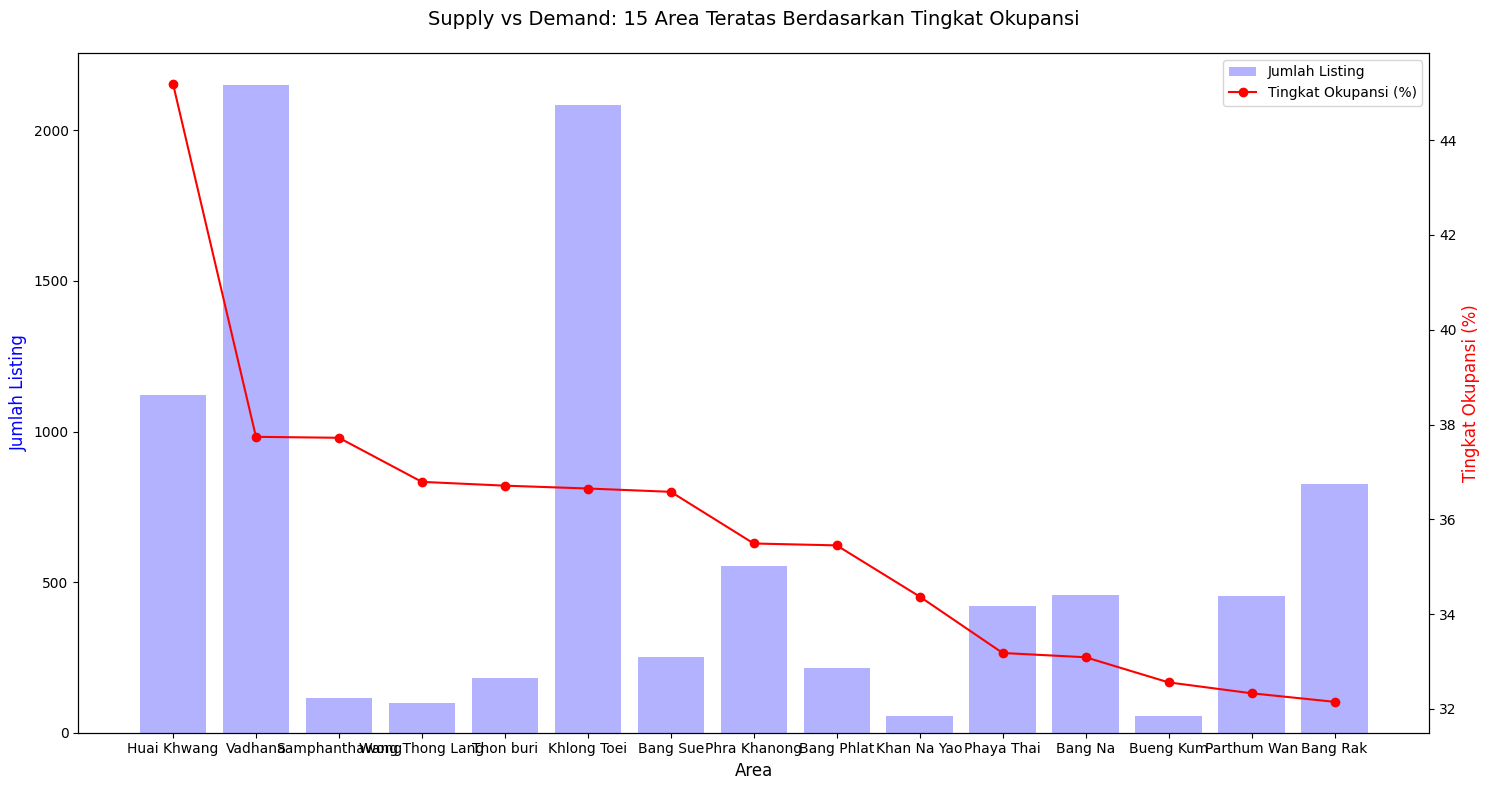

In [268]:
# Visualisasi Supply vs Demand
import matplotlib.pyplot as plt
import seaborn as sns

# Ambil 15 area teratas berdasarkan tingkat okupansi
top_15 = supply_demand.head(15)

# Buat plot
plt.figure(figsize=(15, 8))
ax = plt.gca()

# Plot bars untuk jumlah listing
ax1 = ax.bar(range(len(top_15)), top_15['Jumlah_Listing'], alpha=0.3, color='blue', label='Jumlah Listing')

# Buat axis kedua untuk tingkat okupansi
ax2 = ax.twinx()
ax2.plot(range(len(top_15)), top_15['Tingkat_Okupansi'], color='red', marker='o', label='Tingkat Okupansi (%)')

# Styling
plt.title('Supply vs Demand: 15 Area Teratas Berdasarkan Tingkat Okupansi', fontsize=14, pad=20)
ax.set_xlabel('Area', fontsize=12)
ax.set_ylabel('Jumlah Listing', fontsize=12, color='blue')
ax2.set_ylabel('Tingkat Okupansi (%)', fontsize=12, color='red')

# Rotate x-axis labels
plt.xticks(range(len(top_15)), top_15.index, rotation=45, ha='right')

# Add legends
lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.tight_layout()
plt.savefig('supply_demand_analysis.png')
plt.show()

In [269]:
# Analyze market trends based on supply-demand data
# Identify areas with high occupancy but low supply (undersupply) and vice versa (oversupply)
undersupply = supply_demand[(supply_demand['Tingkat_Okupansi'] > 35) & (supply_demand['Jumlah_Listing'] < 200)]
oversupply = supply_demand[(supply_demand['Tingkat_Okupansi'] < 25) & (supply_demand['Jumlah_Listing'] > 500)]

print("\
Areas with Undersupply (High Demand, Low Supply):")
print(undersupply)

print("\
Areas with Oversupply (Low Demand, High Supply):")
print(oversupply)

Areas with Undersupply (High Demand, Low Supply):
                 Jumlah_Listing  Tingkat_Okupansi
neighbourhood                                    
Samphanthawong              114             37.72
Wang Thong Lang             100             36.79
Thon buri                   182             36.71
Areas with Oversupply (Low Demand, High Supply):
Empty DataFrame
Columns: [Jumlah_Listing, Tingkat_Okupansi]
Index: []


- Area Undersupply (Peluang Pengembangan):
Samphanthawong (Okupansi: 37.72%, Listing: 114)
Wang Thong Lang (Okupansi: 36.79%, Listing: 100)
Thon buri (Okupansi: 36.71%, Listing: 182)
- Area dengan Potensi Tinggi:
Huai Khwang: Okupansi tertinggi (45.19%)
Vadhana: Supply tinggi (2,151 listing) dengan okupansi baik (37.73%)
Khlong Toei: Supply tinggi (2,096 listing) dengan okupansi stabil (36.47%)


Rekomendasi Optimasi:
Tambah listing di area undersupply
Fokus marketing di Samphanthawong dan Wang Thong Lang
Sesuaikan harga di area high-demand

# KESIMPULAN DAN REKOMENDASI

Kesimpulan Umum

Berdasarkan analisis, ditemukan bahwa:



Sebagian besar listing berada di Inner Bangkok dengan proporsi 78.99%, diikuti Urban Fringe sebesar 19.22%, dan Suburban sebesar 1.79%. Lingkungan dengan jumlah listing tinggi, seperti Vadhana dan Khlong Toei, cenderung lebih dekat ke atraksi wisata dan memiliki akses transportasi yang baik. Sementara itu, area seperti Bang Na dan Chatuchak yang memiliki jumlah listing rendah menunjukkan potensi pengembangan lebih lanjut.

Tipe akomodasi "Entire Home/Apt" paling populer di kalangan penyewa, diikuti oleh "Private Room". Tipe seperti "Shared Room" memiliki permintaan lebih rendah, menunjukkan tren preferensi terhadap privasi dan ruang yang lebih luas.

Sebaran Dominan di Area Inner Bangkok: Mayoritas Airbnb terkonsentrasi di area Inner Bangkok, dengan fokus utama pada neighbourhood Vadhana dan Khlong Toei. Ini menunjukkan bahwa properti Airbnb lebih populer di pusat kota, yang disebabkan oleh keberadaan pusat bisnis, tempat-tempat wisata utama, pusat perbelanjaan, dan aksesibilitas yang baik ke transportasi umum.

Neighbourhood dengan Jumlah Airbnb Rendah di Inner Bangkok: Neighbourhood seperti Dusit, Bangkok Yai, dan Samphangthawong memiliki jumlah Airbnb yang relatif rendah di Inner Bangkok. Hal ini bisa menjadi peluang untuk mengeksplorasi dan mengembangkan pasar di daerah-daerah tersebut, baik melalui peningkatan jumlah properti Airbnb maupun melalui strategi pemasaran yang lebih intensif.

Area seperti Inner Bangkok yang merupakan pusat bisnis dan destinasi wisata utama menunjukkan permintaan tinggi. Namun, area Urban Fringe dan Suburban memiliki potensi untuk dikembangkan lebih lanjut guna menarik lebih banyak wisatawan.


Kesimpulan Analasis:

Host seperti Evan dan Curry memiliki pengaruh kuat dengan jumlah ulasan yang tinggi, meskipun jumlah listing mereka tidak selalu paling banyak, menunjukkan bahwa kualitas layanan dan pengalaman tamu menjadi faktor penting dalam keberhasilan.




Rekomendasi

Optimalisasi Area:

Fokus pada pengembangan listing di area Urban Fringe dan Suburban untuk meningkatkan kapasitas dan menarik wisatawan baru.

Tambahkan listing di area dengan potensi tinggi seperti Samphanthawong dan Wang Thong Lang.

Sesuaikan harga di area dengan permintaan tinggi, seperti Huai Khwang dan Vadhana, untuk meningkatkan tingkat okupansi.

Strategi Tipe Akomodasi:

Promosikan tipe "Private Room" dan "Shared Room" dengan memberikan fasilitas tambahan yang menarik untuk meningkatkan daya tarik dan tingkat hunian.

Dorong host baru untuk berinvestasi pada tipe "Entire Home/Apt" karena lebih diminati oleh penyewa.

Pendekatan untuk Host:

Berikan penghargaan dan insentif kepada host dengan ulasan tertinggi, seperti Evan dan Curry, untuk mendorong mereka mempertahankan kualitas layanan.

Luncurkan program pelatihan bagi host baru atau yang kurang berpengalaman untuk meningkatkan keterampilan layanan pelanggan dan manajemen akomodasi.

Pengembangan Fasilitas:

Sediakan fasilitas yang paling diminati, seperti WiFi cepat, dapur lengkap, dan parkir gratis, untuk meningkatkan daya saing listing.

Berikan program loyalitas atau kompetisi antar host untuk memotivasi peningkatan kualitas layanan.

Dengan strategi ini, Airbnb dapat memaksimalkan potensi listing di berbagai area, meningkatkan kepuasan pelanggan, dan mendukung pertumbuhan berkelanjutan dalam pasar sewa jangka pendek.

